# **HW 2: Bank Marketing**
<hr>

<u>**Members**</u><br>
Tharnarch Thoranisttakul 63340500025<br>
Athimet Aiewcharoen 63340500068
<hr>

## **Functions and Necessary Libraries**

In [75]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

import pandas_profiling as pp

# Preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, LabelEncoder, OrdinalEncoder , OneHotEncoder

# Fetures selection
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.decomposition import PCA

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz , plot_tree 
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier  , ExtraTreesClassifier 
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier , RadiusNeighborsClassifier, NearestCentroid

# Model selection
from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedKFold, StratifiedKFold, cross_val_score

# Neural network
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras.optimizers import Adam
from kerastuner.tuners import RandomSearch

# Resampling
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from imblearn.under_sampling import InstanceHardnessThreshold, RandomUnderSampler, NearMiss

# Classification metrics
from sklearn.metrics import plot_confusion_matrix, classification_report, confusion_matrix, precision_recall_curve
from sklearn import metrics

# Pipeline
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin

# Make image directory (img)
import os
if not os.path.exists('img'):
    os.mkdir('img')

In [76]:
# Check TensorFlow Hardware Usage (CPU or GPU)
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(log_device_placement=True))

Num GPUs Available:  1
Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: NVIDIA GeForce RTX 2060, pci bus id: 0000:01:00.0, compute capability: 7.5



In [77]:
class LabelEncoder2():
    def __init__(self, toEncode:list, columnToEncode:list):
        self.toEncode = toEncode
        self.columnToEncode = columnToEncode
        
    def transform(self,X,y=None,**transform_params):
        for toEn, colToEn in zip(self.toEncode, self.columnToEncode):
            X[colToEn] = X[colToEn].apply(lambda x: toEn.index(x))
        return X
    
    def fit(self, X, y=None, **fit_params):
        return self

In [78]:
class ToDummiesTransformer(BaseEstimator, TransformerMixin):
    """ A Dataframe transformer that provide dummy variable encoding
    """
    
    def transform(self, X, **transformparams):
        """ Returns a dummy variable encoded version of a DataFrame
        
        Parameters
        ----------
        X : pandas DataFrame
        
        Returns
        ----------
        trans : pandas DataFrame
        
        """
    
        trans = pd.get_dummies(X).copy()
        return trans

    def fit(self, X, y=None, **fitparams):
        """ Do nothing operation
        
        Returns
        ----------
        self : object
        """
        return self

## **Data Exploration**

From the description file, there are a total of 17 features in this dataset which are:

|Feature Name|Description|Data Type|
|:-:|-|:-:|
|<font color='green'>age</font>|Customer's age (in years)|<font color='red'>Numerical</font>|
|<font color='green'>job</font>|Types of Job|<font color='red'>Categorical</font>|
|<font color='green'>marital</font>|Marital Status|<font color='red'>Categorical</font>|
|<font color='green'>education</font>|Education|<font color='red'>Categorical</font>|
|<font color='green'>default</font>|Has credit in Default?|<font color='red'>Categorical</font>|
|<font color='green'>balance</font>|Average yearly balance|<font color='red'>Numerical</font>|
|<font color='green'>housing</font>|Has housing loan?|<font color='red'>Categorical</font>|
|<font color='green'>loan</font>|Has personal loan?|<font color='red'>Categorical</font>|
|<font color='green'>contact</font>|Contact Communication Type|<font color='red'>Categorical</font>|
|<font color='green'>day</font>|Last contact day of the month|<font color='red'>Numerical</font>|
|<font color='green'>month</font>|Last contact month of the year|<font color='red'>Categorical</font>|
|<font color='green'>duration</font>|Last contact duration (in seconds).<br><br> Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.|<font color='red'>Numerical</font>|
|<font color='green'>campaign</font>|no. of contacts performed during this campaign and for this client|<font color='red'>Numerical</font>|
|<font color='green'>pdays</font>|no. of days that passed by after the client was last contacted from a previous campaign|<font color='red'>Numerical</font>|
|<font color='green'>previous</font>|no. of contacts performed before this campaign and for this client|<font color='red'>Numerical</font>|
|<font color='green'>poutcome</font>|outcome of the previous marketing campaign|<font color='red'>Categorical</font>|
|<font color='green'>y</font>|has the client subscribed a term deposit?|<font color='red'>Categorical</font> [Output]|

Number of instances: 45211 for bank-full.csv <br>
Number of Attributes: 16 + output attribute (17)<br>
(45211 rows, 17 columns)

Missing Attribute Values: None

### **Import Dataset**

In [79]:
dfOri = pd.read_csv('../HWdata/bank/bank-full.csv', sep=';')
df = dfOri.copy()
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [ ]:
df.shape

We can see that this dataset has 45211 instances and 17 features.

<hr>

### **Benchmarking** (before data preprocessing)

In [ ]:
#get the dummy variables for the categorical 
dfBM = df.copy()
dfBM = pd.get_dummies(dfBM, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'])

xBM = dfBM.drop(['y'], axis = 1)
yBM = dfBM['y']

xBM_train, xBM_test, yBM_train, yBM_test = train_test_split(xBM, yBM, test_size = 0.2, random_state = 0)

### **Decision Tree Classifier**

In [ ]:
DT_clf = DecisionTreeClassifier(random_state=0)
DT_clf.fit(xBM_train,yBM_train)
print('Train score: ', DT_clf.score(xBM_train, yBM_train))
print('Test score: ', DT_clf.score(xBM_test, yBM_test))

#### **Predict using Test Data**

In [ ]:
yDT_pred_test = DT_clf.predict(xBM_test)

print("Classification report on Test data\n=======================")
print(classification_report(y_true=yBM_test, y_pred=yDT_pred_test))

print("Confusion matrix on Test data\n=======================")
print(confusion_matrix(y_true=yBM_test, y_pred=yDT_pred_test))

In [ ]:
#get the dummy variables for the categorical 
dfBM = df.copy()
dfBM = pd.get_dummies(dfBM, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'])

xBM = dfBM.drop(['y'], axis = 1)
yBM = dfBM['y']

xBM_train, xBM_test, yBM_train, yBM_test = train_test_split(xBM, yBM, test_size = 0.2, random_state = 0)

### **Multi-Layer Perceptron Classifier**

In [ ]:
MLP_clf = MLPClassifier(random_state=1)
MLP_clf.fit(xBM_train,yBM_train)
print('Train score: ', MLP_clf.score(xBM_train, yBM_train))
print('Test score: ', MLP_clf.score(xBM_test, yBM_test))

#### **Predict using Test Data**

In [ ]:
yMLP_pred_test = MLP_clf.predict(xBM_test)

print("Classification report on Test data\n=======================")
print(classification_report(y_true=yBM_test, y_pred=yMLP_pred_test))

print("Confusion matrix on Test data\n=======================")
print(confusion_matrix(y_true=yBM_test, y_pred=yMLP_pred_test))

### **K-Nearest Neighbors**

In [ ]:
KN_clf = KNeighborsClassifier(n_jobs=-1)
KN_clf.fit(xBM_train,yBM_train)
print('Train score: ', KN_clf.score(xBM_train, yBM_train))
print('Test score: ', KN_clf.score(xBM_test, yBM_test))

#### **Predict using Test Data**

In [ ]:
yKN_pred_test = KN_clf.predict(xBM_test)

print("Classification report on Test data\n=======================")
print(classification_report(y_true=yBM_test, y_pred=yKN_pred_test))

print("Confusion matrix on Test data\n=======================")
print(confusion_matrix(y_true=yBM_test, y_pred=yKN_pred_test))

### **Benchmark Score**

Class Target|Precision|Recall|f1-score|Model Score (Accuracy)|Model|Predict using|
:-:|:-:|:-:|:-:|:-:|:-:|:-:|
0|0.93|0.92|0.93|0.87|Decision Tree|Test Data|
1|0.45|0.47|0.46|^|Decision Tree|Test Data|
0|0.94|0.92|0.93|0.88|MLP|Test Data|
1|0.50|0.59|0.54|^|MLP|Test Data|
0|0.91|0.96|0.93|0.88|K-Nearest|Test Data|
1|0.46|0.25|0.33|^|K-Nearest|Test Data|

<br>
<hr>

### **Remove Unnecessary Feature**

In [ ]:
df.drop('duration', axis=1, inplace=True)

### **Check and Remove Duplicates**

In [ ]:
df.duplicated().sum()

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.info()

After dropping the unnecessary features, we are left with 16 features including output (y).
Since there are no missing values, the instances stay the same.

In which, there are:

- 10 features, including output, that are '<font color='green'>object</font>', which means that they are '<font color='red'>Categorical Features</font>'.
- 6 features that are '<font color='green'>int64</font>', which means that they are '<font color='red'>Numerical Features</font>'

### **Sort Features**
**Order:**
1. Numerical Features
2. Categorical Features
3. Output

**Separate Numerical Features from Dataset**

In [ ]:
dfNum = df.select_dtypes(include=['int64'])

**Separate Categorical Features from Dataset**

In [ ]:
dfCate = df.select_dtypes(include=['object'])
dfCate = dfCate.iloc[:,:-1]

**Separate Output from Dataset**

In [ ]:
dfOut = df.iloc[:,len(df.columns)-1:len(df.columns)]

**Concatenate Separated Data**

In [ ]:
df = pd.concat([dfNum, dfCate, dfOut], axis=1)
df['y'] = df['y'].apply(lambda x: 1 if x == 'yes' else 0)

In [ ]:
df.info()

### **Overall Report**

In [ ]:
profile = pp.ProfileReport(df, title="Bank Full Report")
# profile.to_file('HW2OverallReport.html')
# profile.to_notebook_iframe()

#### **Plot Features of Separated Output**

In [ ]:
df.groupby('y').size().plot(kind='pie',
                            y = "y",
                            label = "Type",
                            autopct='%1.1f%%')

In [ ]:
dfyes = df[df['y'] == 1]
dfno = df[df['y'] == 0]

In [ ]:
plt.figure(figsize=(80, 80))
for idx, col in enumerate(df.columns):
    if col != 'y':
        plt.subplot(16, 16, idx+1)
        sns.histplot(df[col], kde=False)
        plt.title(col + ' (Base)')
for idx, col in enumerate(dfyes.columns):
    if col != 'y':
        plt.subplot(16, 16, idx+len(dfno.columns))
        sns.histplot(dfno[col], kde=False)
        plt.title(col + ' (no)')
for idx, col in enumerate(dfno.columns):
    if col != 'y':
        plt.subplot(16, 16, idx+(len(dfno.columns)*2)-1)
        sns.histplot(dfyes[col], kde=False)
        plt.title(col + ' (yes)')
plt.savefig('img/AllHists.png', bbox_inches='tight')

From here, we will be taking some features that are noticeably different when plotting against output to re-plot it for better visualization.

In [ ]:
colToPlot = ['education', 'housing', 'contact', 'poutcome']
plt.figure(figsize=(25,25))
for idx, col in enumerate(colToPlot):
    plt.subplot(4, 4, idx+1)
    sns.histplot(df[col], kde=False)
    plt.title(col + ' (Full)')
for idx, col in enumerate(colToPlot):
    plt.subplot(4, 4, idx+len(colToPlot)+1)
    sns.histplot(dfno[col], kde=False)
    plt.title(col + ' (no)')
for idx, col in enumerate(colToPlot):
    plt.subplot(4, 4, idx+1+(len(colToPlot)*2))
    sns.histplot(dfyes[col], kde=False)
    plt.title(col + ' (yes)')
plt.savefig('img/SelectedHists.png', bbox_inches='tight')

We can see that these features have different charts when plotting against each output. Features plotted against output 'yes' have different bar charts compared to features plotted against all output data while features plotted against output 'no' has the same bar charts.

|Feature Names|Information|
|-|-|
|education|The client with 'secondary' education level has more chance to subscribe a term deposit|
|housing|The client with 'no' housing loan has more chance to subscribe a term deposit|
|contact|The client with 'unknown' communication type has more chance not to subscribe a term deposit|
|poutcome|The client with 'success' outcome of the previous marketing campaign has more chance to subscribe a term deposit|

#### **Pairplotting Data Samples**

In [ ]:
sns.pairplot(df.sample(int(df.shape[0]/10), random_state=777), diag_kind="kde", hue='y')
plt.savefig('img/PairplotSample.png', bbox_inches='tight')

As we can see when pairplotting, variance between features are quite low, so that we can't see the difference between 'no' and 'yes' output, variance within class are quite high in some feature.

#### **Check for Outliers**

In [ ]:
plt.figure(figsize=(30,30))
for idx, col in enumerate(dfNum.columns):
    plt.subplot(2, 8, idx+1)
    sns.boxplot(x='y', y=col, data=df)
    plt.title(col + ' (box)')
for idx, col in enumerate(dfNum.columns):
    plt.subplot(2, 8, idx+len(dfNum.columns)+1)
    sns.stripplot(x="y", y=col, data=df)    
    plt.title(col + ' (strip)')
plt.savefig('img/BoxStrip.png', bbox_inches='tight')

From the plot above, outliers can be seen in the following features:
- balance
- campaign
- previous

We will remove the outliers at the start of data preprocessing.

### **Data Exploration's Conclusion**

From the overall report,

Plotting Histogram of Numerical Features:

|Feature Names|Distribution|
|-|-|
|age|Right-skewed|
|balance|Right-skewed|
|day|Uniform|
|campaign|Right-skewed|
|pdays|Right-skewed|
|previous|Right-skewed|

Plotting Values Count of Categorical Features:

|Feature Names|What we got|
|-|-|
|job|Most common jobs are 'blue-collar', 'management' and 'technician' (59.2% in total).|
|marital|60.2% of this data are 'Married', 28.3% are 'Single' and the rest are 'Divorced'|
|education|Mostly 'secondary' (51.3%) followed by 'tertiary' (29.4%), 'primary' (15.2%) and 'unknown' (4.1%)|
|default|Mostly 'false' (98.2%)|
|housing|55.6% are 'true' and the rest are 'false'|
|loan|Mostly 'false' (84%)|
|contact|Mostly 'cellular' (64.8%) followed by 'unknown' (28.8%) and 'telephone' (6.4%)|
|month|Mostly 'may' (30.4%)|
|poutcome|Mostly 'unknown' (81.7%) followed by 'failure' (10.8%), 'other' (4.1%) and 'success' (3.3%)|

Good things of this dataset:

|Good Things|Explanation|
|-|-|
|Filled Data in Numerical Features|There are no missing data (NaN) or unknown in numerical features of this dataset.|

Bad things of this dataset:

|Bad Things|Explanation|
|-|-|
|Data Explanation|Most features come with little to no explanation or bad explanation.|
|Data Distribution|There are no normal distributed data. Almost all of them are right-skewed.|
|Correlation|There are a lot of high correlation between features.|
|'poutcome' Features|This feature's data are mostly 'unknown' (around 81.7%).|
|Unknown Data|Unclear explanation of what unknown data means and there are a lot of them in categorical features.|
|Data Variation|As we can see when pairplotting, variance between features are quite low and variance within class are quite high in some feature, which means that data variation is very bad.|
|Output data|The output is imbalanced. ('1' is 11.7% and '0' is 88.3%)|

**NOTE**: For all 'Unknown' data in categorical features, we assumed 'Unknown' as a type of data because there are quite a lot of 'Unknown' data.

Furthermore, because we are dealing with a dataset from bank, those 'Unknown' data might be undisclosed information of the customers.

<hr>

## **Data Preprocessing**

### **Experiment 1 : Remove Outliers**

#### **Hypothesis**
    
Outliers in features affects model's performance.

From the figure,

<img src='img/BoxStrip.png'/>

we will be removing outliers from the following features:
- balance
- campaign
- previous

In [ ]:
dfEX1 = df.copy()

In [ ]:
plt.figure(figsize=(12, 12))
plt.title('balance vs y (detailed)')
plt.yticks(np.arange(0, 120000, 5000))
plt.plot(np.arange(-1, 3, 1), np.full(4, 80000), 'g--')
plt.plot(np.arange(0.5, 3, 1), np.full(3, 45000), 'g--')
sns.stripplot(x="y", y="balance", data=dfEX1)
plt.savefig('img/balance-y-detailed.png', bbox_inches='tight')

In [ ]:
plt.figure(figsize=(12, 12))
plt.title('campaign vs y (detailed)')
plt.yticks(np.arange(0, 70, 1))
plt.plot(np.arange(-1, 3, 1), np.full(4, 45), 'g--')
plt.plot(np.arange(0.5, 3, 1), np.full(3, 18), 'g--')
sns.stripplot(x="y", y="campaign", data=dfEX1)
plt.savefig('img/campaign-y-detailed.png', bbox_inches='tight')

In [ ]:
dfEX1 = dfEX1.drop(dfEX1[dfEX1['previous'] > 60].index)
plt.figure(figsize=(12, 12))
plt.title('previous vs y (detailed)')
plt.yticks(np.arange(0, 50, 1))
plt.plot(np.arange(-1, 3, 1), np.full(4, 30), 'g--')
plt.plot(np.arange(0.5, 3, 1), np.full(3, 19), 'g--')
sns.stripplot(x="y", y="previous", data=dfEX1)
plt.savefig('img/previous-y-detailed.png', bbox_inches='tight')

In [ ]:
dfEX1 = dfEX1.drop(dfEX1[dfEX1['balance'] >= 50000].index)
dfEX1 = dfEX1.drop(dfEX1[dfEX1['balance'] >= 45000].index & dfEX1[dfEX1['y'] == 1].index)
dfEX1 = dfEX1.drop(dfEX1[dfEX1['campaign'] >= 45].index)
dfEX1 = dfEX1.drop(dfEX1[dfEX1['campaign'] >= 18].index & dfEX1[dfEX1['y'] == 1].index)
dfEX1 = dfEX1.drop(dfEX1[dfEX1['previous'] >= 30].index)
dfEX1 = dfEX1.drop(dfEX1[dfEX1['previous'] >= 19].index & dfEX1[dfEX1['y'] == 1].index)

dfEX1.shape

After removing outliers, we are left with <u>**45142 instances**</u> (originally 45211 instances).

In [ ]:
plt.figure(figsize=(45, 15))
for idx, col in enumerate(['balance', 'campaign', 'previous']):
    plt.subplot(1, 3, idx+1)
    sns.stripplot(x='y', y=col, data=dfEX1)
    plt.title(col + ' (after removing outliers)')
plt.savefig('img/SelectedHists-After.png', bbox_inches='tight')

<hr>

#### **Benchmarking** (Remove Outliers)

In [ ]:
#get the dummy variables for the categorical 
dfEX1_BM = dfEX1.copy()
dfEX1_BM = pd.get_dummies(dfEX1_BM, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'])

xEX1 = dfEX1_BM.drop(['y'], axis = 1)
yEX1 = dfEX1_BM['y']

xEX1_train, xEX1_test, yEX1_train, yEX1_test = train_test_split(xEX1, yEX1, test_size = 0.2, random_state = 0)

##### **Decision Tree Classifier**

In [ ]:
DT_clf_Ex1 = DecisionTreeClassifier(random_state=0)
DT_clf_Ex1.fit(xEX1_train,yEX1_train)
print('Train score: ', DT_clf_Ex1.score(xEX1_train, yEX1_train))
print('Test score: ', DT_clf_Ex1.score(xEX1_test, yEX1_test))

In [ ]:
yDT_pred_test = DT_clf_Ex1.predict(xEX1_test)

print("Classification report on Test data\n=======================")
print(classification_report(y_true=yEX1_test, y_pred=yDT_pred_test))

print("Confusion matrix on Test data\n=======================")
print(confusion_matrix(y_true=yEX1_test, y_pred=yDT_pred_test))

##### **Multi-Layer Perceptron Classifier**

In [ ]:
MLP_clf_Ex1 = MLPClassifier(random_state=1)
MLP_clf_Ex1.fit(xEX1_train,yEX1_train)
print('Train score: ', MLP_clf_Ex1.score(xEX1_train, yEX1_train))
print('Test score: ', MLP_clf_Ex1.score(xEX1_test, yEX1_test))

In [ ]:
yMLP_pred_test = MLP_clf_Ex1.predict(xEX1_test)

print("Classification report on Test data\n=======================")
print(classification_report(y_true=yEX1_test, y_pred=yMLP_pred_test))

print("Confusion matrix on Test data\n=======================")
print(confusion_matrix(y_true=yEX1_test, y_pred=yMLP_pred_test))

##### **K-Nearest Neighbors**

In [ ]:
KN_clf_Ex1 = KNeighborsClassifier(n_jobs=-1)
KN_clf_Ex1.fit(xEX1_train,yEX1_train)
print('Train score: ', KN_clf_Ex1.score(xEX1_train, yEX1_train))
print('Test score: ', KN_clf_Ex1.score(xEX1_test, yEX1_test))

In [ ]:
yKN_pred_test = KN_clf_Ex1.predict(xEX1_test)

print("Classification report on Test data\n=======================")
print(classification_report(y_true=yEX1_test, y_pred=yKN_pred_test))

print("Confusion matrix on Test data\n=======================")
print(confusion_matrix(y_true=yEX1_test, y_pred=yKN_pred_test))

#### **Conclusion**

From the result of this experiment, we can compare the model's performance before and after removing outliers.

1. Decision Tree  

|Class Target|Precision|Recall|f1-score|Model Score (Accuracy)|Model|Predict using|
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|0|0.93|0.92|0.93|0.87|Decision Tree|Test Data|
|1|0.45|0.47|0.46|^|Decision Tree|Test Data|
|0|0.93|0.93|0.93|0.90|Decision Tree|Test Ex1 Data|
|1|0.50|0.51|0.51|^|Decision Tree|Test Ex1 Data|

2. MLP  

|Class Target|Precision|Recall|f1-score|Model Score (Accuracy)|Model|Predict using|
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|0|0.93|0.94|0.94|0.89|MLP|Test Data|
|1|0.52|0.49|0.51|^|MLP|Test Data|
|0|0.93|0.95|0.94|0.89|MLP|Test Ex1 Data|
|1|0.55|0.42|0.48|^|MLP|Test Ex1 Data|

3. K-Nearest  

|Class Target|Precision|Recall|f1-score|Model Score (Accuracy)|Model|Predict using|
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|0|0.91|0.96|0.93|0.88|K-Nearest|Test Data|
|1|0.46|0.25|0.33|^|K-Nearest|Test Data|
|0|0.91|0.96|0.93|0.88|K-Nearest|Test Ex1 Data|
|1|0.48|0.27|0.34|^|K-Nearest|Test Ex1 Data|

From the result above, we can see that removing outliers from the data can improve the model's performance. Therefore, we will be removing outliers from the data.

In [ ]:
df = dfEX1.copy()

### **Experiment 2 : Data Imbalance**

#### **Hypothesis**
    
Imbalance data affects model's performance.

In [ ]:
toEncode = [["no","yes"], ["no","yes"], ["no","yes"], ["unknown","jan","feb","mar","apr","may","jun","jul","aug","sep","oct","nov","dec"]]
columnToEncode = ['default', 'housing', 'loan', 'month']
columnToOnehot = ['job', 'marital', 'education', 'contact', 'poutcome']

LE_pipeline = Pipeline([
    ("LabelEncoder", LabelEncoder2(toEncode, columnToEncode)),
    ("OneHotEncoder", ToDummiesTransformer())
])

In [ ]:
df.groupby('y').size().plot(kind='pie',
                            y = "y",
                            label = "Type",
                            autopct='%1.1f%%')
print(df.groupby('y').size())

In [ ]:
dfDI = df.copy()
dfDI = LE_pipeline.fit_transform(dfDI)

xdi_train , xdi_test , ydi_train , ydi_test = train_test_split(dfDI.drop(['y'], axis = 1), dfDI['y'], test_size = 0.2, random_state = 0)

In [ ]:
dfDI.head()

So, We consider to use 6 different methods to address the imbalance data problem.
1. Random Oversampling
2. SMOTE
3. ADASYN
4. Random Undersampling
5. InstanceHardnessThreshold
6. NearMiss

#### **Random Oversampling**

In [ ]:
ros = RandomOverSampler(random_state=0)
x_ros, y_ros = ros.fit_resample(xdi_train, ydi_train)
dfDI_Ros = pd.concat([x_ros, y_ros], axis=1)

In [ ]:
dfDI_Ros.groupby('y').size().plot(kind='pie',
                            y = "y",
                            label = "Type",
                            autopct='%1.1f%%')
print(dfDI_Ros.groupby('y').size())

#### **SMOTE**

In [ ]:
smote = SMOTE(random_state=0)
x_su, y_su = smote.fit_resample(xdi_train, ydi_train)
dfDI_SM = pd.concat([x_su, y_su], axis=1)

In [ ]:
dfDI_SM.groupby('y').size().plot(kind='pie',
                            y = "y",
                            label = "Type",
                            autopct='%1.1f%%')
print(dfDI_SM.groupby('y').size())

#### **ADASYN**

In [ ]:
adasyb = ADASYN(random_state=0)
x_ad, y_ad = adasyb.fit_resample(xdi_train, ydi_train)
dfDI_AD = pd.concat([x_ad, y_ad], axis=1)

In [ ]:
dfDI_AD.groupby('y').size().plot(kind='pie',
                            y = "y",
                            label = "Type",
                            autopct='%1.1f%%')
print(dfDI_AD.groupby('y').size())

#### **Random Undersampling**

In [ ]:
rus = RandomUnderSampler(random_state=0)
x_rus , y_rus = rus.fit_resample(xdi_train, ydi_train)
dfDI_RUS = pd.concat([x_rus, y_rus], axis=1)

In [ ]:
dfDI_RUS.groupby('y').size().plot(kind='pie',
                            y = "y",
                            label = "Type",
                            autopct='%1.1f%%')
print(dfDI_RUS.groupby('y').size())

#### **Instance Hardness Threshold**

In [ ]:
instanace = InstanceHardnessThreshold(n_jobs=-1)
x_iht , y_iht = instanace.fit_resample(xdi_train, ydi_train)
dfDI_IHT = pd.concat([x_iht, y_iht], axis=1)

In [ ]:
dfDI_IHT.groupby('y').size().plot(kind='pie',
                            y = "y",
                            label = "Type",
                            autopct='%1.1f%%')
print(dfDI_IHT.groupby('y').size())

#### **NearMiss**

In [ ]:
nearMiss = NearMiss(n_jobs=-1)
x_nearM , y_nearM = nearMiss.fit_resample(xdi_train, ydi_train)
dfDI_NearM = pd.concat([x_nearM, y_nearM], axis=1)

In [ ]:
dfDI_NearM.groupby('y').size().plot(kind='pie',
                            y = "y",
                            label = "Type",
                            autopct='%1.1f%%')
print(dfDI_NearM.groupby('y').size())

#### **Histogram Comparison**

In [ ]:
plt.figure(figsize=(25, 5))
for idx, col in enumerate(dfNum.columns):
    if col != 'y':
        plt.subplot(1, 7, idx+1)
        sns.histplot(df[col], kde=True,bins=20)
        plt.title(col + ' (Base)')

In [ ]:
plt.figure(figsize=(25, 5))
for idx, col in enumerate(dfNum.columns):
    if col != 'y':
        plt.subplot(1, 7, idx+1)
        sns.histplot(dfDI_Ros[col], kde=True,bins=20)
        plt.title(col + ' (Random Over Sampling)')

In [ ]:
plt.figure(figsize=(25, 5))
for idx, col in enumerate(dfNum.columns):
    if col != 'y':
        plt.subplot(1, 7, idx+1)
        sns.histplot(dfDI_SM[col], kde=True,bins=20)
        plt.title(col + ' (SMOTE)')

In [ ]:
plt.figure(figsize=(25, 5))
for idx, col in enumerate(dfNum.columns):
    if col != 'y':
        plt.subplot(1, 7, idx+1)
        sns.histplot(dfDI_AD[col], kde=True,bins=20)
        plt.title(col + ' (ADASYN)')

In [ ]:
plt.figure(figsize=(25, 5))
for idx, col in enumerate(dfNum.columns):
    if col != 'y':
        plt.subplot(1, 7, idx+1)
        sns.histplot(dfDI_RUS[col], kde=True,bins=20)
        plt.title(col + ' (Random Under Sampling)')

In [ ]:
plt.figure(figsize=(28, 5))
for idx, col in enumerate(dfNum.columns):
    if col != 'y':
        plt.subplot(1, 7, idx+1)
        sns.histplot(dfDI_IHT[col], kde=True,bins=20)
        plt.title(col + ' (Instance Hardness Threshold)')

In [ ]:
plt.figure(figsize=(25, 5))
for idx, col in enumerate(dfNum.columns):
    if col != 'y':
        plt.subplot(1, 7, idx+1)
        sns.histplot(dfDI_NearM[col], kde=True,bins=20)
        plt.title(col + ' (Near Miss)')

We can see that in some features, the data not have the same distribution as the original data.

#### **Model Training**

In [ ]:
DT_clf_Ex2_Base = DecisionTreeClassifier(random_state=0)
MLP_clf_Ex2_Base = MLPClassifier(random_state=1)
KN_clf_Ex2_Base = KNeighborsClassifier(n_jobs=-1)
DT_clf_Ex2_Base.fit(xdi_train, ydi_train)
MLP_clf_Ex2_Base.fit(xdi_train, ydi_train)
KN_clf_Ex2_Base.fit(xdi_train, ydi_train)
print("Decision Tree Classifier Base: ", DT_clf_Ex2_Base.score(xdi_test, ydi_test))
print("MLP Classifier Base: ", MLP_clf_Ex2_Base.score(xdi_test, ydi_test))
print("KNeighbors Classifier Base: ", KN_clf_Ex2_Base.score(xdi_test, ydi_test))

In [ ]:
yDI_pred_test1 = DT_clf_Ex2_Base.predict(xdi_test)
yDI_pred_test2 = MLP_clf_Ex2_Base.predict(xdi_test)
yDI_pred_test3 = KN_clf_Ex2_Base.predict(xdi_test)

print("Classification report on Test data with Decision Tree Classifier\n=======================")
print(classification_report(y_true=ydi_test, y_pred=yDI_pred_test1))
print("Classification report on Test data with MLP Classifier\n=======================")
print(classification_report(y_true=ydi_test, y_pred=yDI_pred_test2))
print("Classification report on Test data with KNN Classifier\n=======================")
print(classification_report(y_true=ydi_test, y_pred=yDI_pred_test3))

##### **Random Oversampling**

In [ ]:
DT_clf_Ex2_ros = DecisionTreeClassifier(random_state=0)
MLP_clf_Ex2_ros = MLPClassifier(random_state=1)
KN_clf_Ex2_ros = KNeighborsClassifier(n_jobs=-1)
DT_clf_Ex2_ros.fit(x_ros,y_ros)
MLP_clf_Ex2_ros.fit(x_ros,y_ros)
KN_clf_Ex2_ros.fit(x_ros,y_ros)
print("Score of Decision Tree Classifier on test data with Random Over Sampling: ",DT_clf_Ex2_ros.score(xdi_test,ydi_test))
print("Score of MLP Classifier on test data with Random Over Sampling: ",MLP_clf_Ex2_ros.score(xdi_test,ydi_test))
print("Score of KNN Classifier on test data with Random Over Sampling: ",KN_clf_Ex2_ros.score(xdi_test,ydi_test))

In [ ]:
yDI_pred_test1 = DT_clf_Ex2_ros.predict(xdi_test)
yDI_pred_test2 = MLP_clf_Ex2_ros.predict(xdi_test)
yDI_pred_test3 = KN_clf_Ex2_ros.predict(xdi_test)

print("Classification report on Test data with Decision Tree Classifier\n=======================")
print(classification_report(y_true=ydi_test, y_pred=yDI_pred_test1))
print("Classification report on Test data with MLP Classifier\n=======================")
print(classification_report(y_true=ydi_test, y_pred=yDI_pred_test2))
print("Classification report on Test data with KNN Classifier\n=======================")
print(classification_report(y_true=ydi_test, y_pred=yDI_pred_test3))

##### **SMOTE**

In [ ]:
DT_clf_Ex2_sm = DecisionTreeClassifier(random_state=0)
MLP_clf_Ex2_sm = MLPClassifier(random_state=1)
KN_clf_Ex2_sm = KNeighborsClassifier(n_jobs=-1)
DT_clf_Ex2_sm.fit(x_su,y_su)
MLP_clf_Ex2_sm.fit(x_su,y_su)
KN_clf_Ex2_sm.fit(x_su,y_su)
print("Score of Decision Tree Classifier on test data with SMOTE: ",DT_clf_Ex2_sm.score(xdi_test,ydi_test))
print("Score of MLP Classifier on test data with SMOTE: ",MLP_clf_Ex2_sm.score(xdi_test,ydi_test))
print("Score of KNN Classifier on test data with SMOTE: ",KN_clf_Ex2_sm.score(xdi_test,ydi_test))


In [ ]:
yDI_pred_test1 = DT_clf_Ex2_sm.predict(xdi_test)
yDI_pred_test2 = MLP_clf_Ex2_sm.predict(xdi_test)
yDI_pred_test3 = KN_clf_Ex2_sm.predict(xdi_test)

print("Classification report on Test data with Decision Tree Classifier\n=======================")
print(classification_report(y_true=ydi_test, y_pred=yDI_pred_test1))
print("Classification report on Test data with MLP Classifier\n=======================")
print(classification_report(y_true=ydi_test, y_pred=yDI_pred_test2))
print("Classification report on Test data with KNN Classifier\n=======================")
print(classification_report(y_true=ydi_test, y_pred=yDI_pred_test3))

##### **ADASYN**

In [ ]:
DT_clf_Ex2_ad = DecisionTreeClassifier(random_state=0)
MLP_clf_Ex2_ad = MLPClassifier(random_state=1)
KN_clf_Ex2_ad = KNeighborsClassifier(n_jobs=-1)
DT_clf_Ex2_ad.fit(x_ad,y_ad)
MLP_clf_Ex2_ad.fit(x_ad,y_ad)
KN_clf_Ex2_ad.fit(x_ad,y_ad)
print("Score of Decision Tree Classifier on test data with ADASYN: ",DT_clf_Ex2_ad.score(xdi_test,ydi_test))
print("Score of MLP Classifier on test data with ADASYN: ",MLP_clf_Ex2_ad.score(xdi_test,ydi_test))
print("Score of KNN Classifier on test data with ADASYN: ",KN_clf_Ex2_ad.score(xdi_test,ydi_test))

In [ ]:
yDI_pred_test1 = DT_clf_Ex2_ad.predict(xdi_test)
yDI_pred_test2 = MLP_clf_Ex2_ad.predict(xdi_test)
yDI_pred_test3 = KN_clf_Ex2_ad.predict(xdi_test)

print("Classification report on Test data with Decision Tree Classifier\n=======================")
print(classification_report(y_true=ydi_test, y_pred=yDI_pred_test1))
print("Classification report on Test data with MLP Classifier\n=======================")
print(classification_report(y_true=ydi_test, y_pred=yDI_pred_test2))
print("Classification report on Test data with KNN Classifier\n=======================")
print(classification_report(y_true=ydi_test, y_pred=yDI_pred_test3))

##### **Random Undersampling**

In [ ]:
DT_clf_Ex2_rus = DecisionTreeClassifier(random_state=0)
MLP_clf_Ex2_rus = MLPClassifier(random_state=1)
KN_clf_Ex2_rus = KNeighborsClassifier(n_jobs=-1)
DT_clf_Ex2_rus.fit(x_rus,y_rus)
MLP_clf_Ex2_rus.fit(x_rus,y_rus)
KN_clf_Ex2_rus.fit(x_rus,y_rus)
print("Score of Decision Tree Classifier on test data with Random Under Sampling: ",DT_clf_Ex2_rus.score(xdi_test,ydi_test))
print("Score of MLP Classifier on test data with Random Under Sampling: ",MLP_clf_Ex2_rus.score(xdi_test,ydi_test))
print("Score of KNN Classifier on test data with Random Under Sampling: ",KN_clf_Ex2_rus.score(xdi_test,ydi_test))

In [ ]:
yDI_pred_test1 = DT_clf_Ex2_rus.predict(xdi_test)
yDI_pred_test2 = MLP_clf_Ex2_rus.predict(xdi_test)
yDI_pred_test3 = KN_clf_Ex2_rus.predict(xdi_test)

print("Classification report on Test data with Decision Tree Classifier\n=======================")
print(classification_report(y_true=ydi_test, y_pred=yDI_pred_test1))
print("Classification report on Test data with MLP Classifier\n=======================")
print(classification_report(y_true=ydi_test, y_pred=yDI_pred_test2))
print("Classification report on Test data with KNN Classifier\n=======================")
print(classification_report(y_true=ydi_test, y_pred=yDI_pred_test3))

##### **InstanceHardnessThreshold**

In [ ]:
DT_clf_Ex2_iht = DecisionTreeClassifier(random_state=0)
MLP_clf_Ex2_iht = MLPClassifier(random_state=1)
KN_clf_Ex2_iht = KNeighborsClassifier(n_jobs=-1)
DT_clf_Ex2_iht.fit(x_iht,y_iht)
MLP_clf_Ex2_iht.fit(x_iht,y_iht)
KN_clf_Ex2_iht.fit(x_iht,y_iht)
print("Score of Decision Tree Classifier on test data with Instance Hardness Threshold: ",DT_clf_Ex2_iht.score(xdi_test,ydi_test))
print("Score of MLP Classifier on test data with Instance Hardness Threshold: ",MLP_clf_Ex2_iht.score(xdi_test,ydi_test))
print("Score of KNN Classifier on test data with Instance Hardness Threshold: ",KN_clf_Ex2_iht.score(xdi_test,ydi_test))

In [ ]:
yDI_pred_test1 = DT_clf_Ex2_iht.predict(xdi_test)
yDI_pred_test2 = MLP_clf_Ex2_iht.predict(xdi_test)
yDI_pred_test3 = KN_clf_Ex2_iht.predict(xdi_test)

print("Classification report on Test data with Decision Tree Classifier\n=======================")
print(classification_report(y_true=ydi_test, y_pred=yDI_pred_test1))
print("Classification report on Test data with MLP Classifier\n=======================")
print(classification_report(y_true=ydi_test, y_pred=yDI_pred_test2))
print("Classification report on Test data with KNN Classifier\n=======================")
print(classification_report(y_true=ydi_test, y_pred=yDI_pred_test3))

##### **NearMiss**

In [ ]:
DT_clf_Ex2_nm = DecisionTreeClassifier(random_state=0)
MLP_clf_Ex2_nm = MLPClassifier(random_state=1)
KN_clf_Ex2_nm = KNeighborsClassifier(n_jobs=-1)
DT_clf_Ex2_nm.fit(x_nearM,y_nearM)
MLP_clf_Ex2_nm.fit(x_nearM,y_nearM)
KN_clf_Ex2_nm.fit(x_nearM,y_nearM)
print("Score of Decision Tree Classifier on test data with Near Miss: ",DT_clf_Ex2_nm.score(xdi_test,ydi_test))
print("Score of MLP Classifier on test data with Near Miss: ",MLP_clf_Ex2_nm.score(xdi_test,ydi_test))
print("Score of KNN Classifier on test data with Near Miss: ",KN_clf_Ex2_nm.score(xdi_test,ydi_test))

In [ ]:
yDI_pred_test1 = DT_clf_Ex2_nm.predict(xdi_test)
yDI_pred_test2 = MLP_clf_Ex2_nm.predict(xdi_test)
yDI_pred_test3 = KN_clf_Ex2_nm.predict(xdi_test)

print("Classification report on Test data with Decision Tree Classifier\n=======================")
print(classification_report(y_true=ydi_test, y_pred=yDI_pred_test1))
print("Classification report on Test data with MLP Classifier\n=======================")
print(classification_report(y_true=ydi_test, y_pred=yDI_pred_test2))
print("Classification report on Test data with KNN Classifier\n=======================")
print(classification_report(y_true=ydi_test, y_pred=yDI_pred_test3))

#### **Conclusion**

Class Target|Precision|Recall|f1-score|Model Score (Accuracy)|Model|Predict using|
:-:|:-:|:-:|:-:|:-:|:-:|:-:|
0|0.93|0.92|0.93|0.88|Decision Tree|No Resampling|
1|0.49|0.51|0.50|^|Decision Tree|No Resampling|
0|0.94|0.91|0.93|0.87|MLP|No Resampling|
1|0.46|0.59|0.52|^|MLP|No Resampling|
0|0.91|0.96|0.93|0.88|K-Nearest|No Resampling|
1|0.48|0.27|0.35|^|K-Nearest|No Resampling|

<br>

Class Target|Precision|Recall|f1-score|Model Score (Accuracy)|Model|Predict using|
:-:|:-:|:-:|:-:|:-:|:-:|:-:|
0|0.93|0.93|0.93|0.88|Decision Tree|Random Oversampling|
1|0.48|0.45|0.46|^|Decision Tree|Random Oversamplinga|
0|0.96|0.82|0.88|0.81|MLP|Random Oversampling|
1|0.35|0.73|0.47|^|MLP|Random Oversampling|
0|0.94|0.82|0.87|0.79|K-Nearest|Random Oversampling|
1|0.31|0.60|0.41|^|K-Nearest|Random Oversampling|

<br>

Class Target|Precision|Recall|f1-score|Model Score (Accuracy)|Model|Predict using|
:-:|:-:|:-:|:-:|:-:|:-:|:-:|
0|0.93|0.92|0.92|0.87|Decision Tree|SMOTE|
1|0.45|0.49|0.47|^|Decision Tree|SMOTE|
0|0.93|0.95|0.94|0.89|MLP|SMOTE|
1|0.53|0.45|0.48|^|MLP|SMOTE|
0|0.94|0.79|0.86|0.77|K-Nearest|SMOTE|
1|0.29|0.62|0.39|^|K-Nearest|SMOTE|

<br>

Class Target|Precision|Recall|f1-score|Model Score (Accuracy)|Model|Predict using|
:-:|:-:|:-:|:-:|:-:|:-:|:-:|
0|0.93|0.91|0.92|0.86|Decision Tree|ADASYN|
1|0.44|0.50|0.46|^|Decision Tree|ADASYN|
0|0.91|0.98|0.94|0.89|MLP|ADASYN|
1|0.64|0.24|0.35|^|MLP|ADASYN|
0|0.94|0.76|0.84|0.75|K-Nearest|ADASYN|
1|0.27|0.65|0.38|^|K-Nearest|ADASYN|

<br>

Class Target|Precision|Recall|f1-score|Model Score (Accuracy)|Model|Predict using|
:-:|:-:|:-:|:-:|:-:|:-:|:-:|
0|0.96|0.80|0.87|0.80|Decision Tree|Random Undersampling|
1|0.34|0.78|0.48|^|Decision Tree|Random Undersampling|
0|0.93|0.93|0.93|0.87|MLP|Random Undersampling|
1|0.46|0.47|0.47|^|MLP|Random Undersampling|
0|0.95|0.76|0.85|0.76|K-Nearest|Random Undersampling|
1|0.29|0.73|0.41|^|K-Nearest|Random Undersampling|

<br>

Class Target|Precision|Recall|f1-score|Model Score (Accuracy)|Model|Predict using|
:-:|:-:|:-:|:-:|:-:|:-:|:-:|
0|0.99|0.69|0.82|0.72|Decision Tree|Instance Hardness Threshold|
1|0.29|0.96|0.45|^|Decision Tree|Instance Hardness Threshold|
0|0.98|0.63|0.77|0.67|MLP|Instance Hardness Threshold|
1|0.25|0.92|0.40|^|MLP|Instance Hardness Threshold|
0|0.96|0.78|0.86|0.78|K-Nearest|Instance Hardness Threshold|
1|0.31|0.73|0.43|^|K-Nearest|Instance Hardness Threshold|

<br>

Class Target|Precision|Recall|f1-score|Model Score (Accuracy)|Model|Predict using|
:-:|:-:|:-:|:-:|:-:|:-:|:-:|
0|0.97|0.39|0.56|0.45|Decision Tree|Near Miss|
1|0.17|0.91|0.28|^|Decision Tree|Near Miss|
0|0.95|0.50|0.65|0.54|MLP|Near Miss|
1|0.18|0.82|0.29|^|MLP|Near Miss|
0|0.96|0.41|0.58|0.47|K-Nearest|Near Miss|
1|0.16|0.86|0.28|^|K-Nearest|Near Miss|

Since resampling makes the data have more or less instances, we have to train the model again. Therefore, we trained the model again with the 3 models that we chose before, which are Decision Tree, MLP, K-Nearest, using the data that we resampled. However, the results showed that resampling our data set will reduce the performance of our model in some cases or not increase in some cases. In addition, resampling multiple times will change the histogram of the data.

Therefore, we will not consider using the data that we resampled to train the model further.

### **Experiment 3 : Data Transformation**

#### **Hypothesis**
    
Right-skewed data affects model's performance.

In [ ]:
plt.figure(figsize=(25, 5))
for idx, col in enumerate(dfNum.columns):
    if col != 'y':
        plt.subplot(1, 7, idx+1)
        sns.histplot(df[col], kde=True,bins=20)
        plt.title(col + ' (Base)')

Since the data is right-skewed, we will try to transform the data to make it more normal distribution. We will try to transform the data using log, square root, and cube root.

#### **Age Feature**

In [ ]:
age_base = df['age']
age_log = np.log(df["age"])
age_sqrt = np.sqrt(df["age"])
age_cbrt = np.cbrt(df["age"])
title = ['age', 'log(age)', 'sqrt(age)', 'cbrt(age)']
plt.figure(figsize=(25, 5))
for idx, col in enumerate([age_base, age_log, age_sqrt, age_cbrt]):
    plt.subplot(1, 4, idx+1)
    sns.histplot(col, kde=True,bins=20)
    plt.title(title[idx])

#### **Balance Feature**

In [ ]:
balance_base = df['balance']
balance_log = np.log(df["balance"])
balance_sqrt = np.sqrt(df["balance"])
balance_cbrt = np.cbrt(df["balance"])
title = ['balance', 'log(balance)', 'sqrt(balance)', 'cbrt(balance)']
plt.figure(figsize=(25, 5))
for idx, col in enumerate([balance_base, balance_log, balance_sqrt, balance_cbrt]):
    plt.subplot(1, 4, idx+1)
    sns.histplot(col, kde=True,bins=20)
    plt.title(title[idx])

#### **Day Feature**

In [ ]:
day_base = df['day']
day_log = np.log(df["day"])
day_sqrt = np.sqrt(df["day"])
day_cbrt = np.cbrt(df["day"])
title = ['day', 'log(day)', 'sqrt(day)', 'cbrt(day)']
plt.figure(figsize=(25, 5))
for idx, col in enumerate([day_base, day_log, day_sqrt, day_cbrt]):
    plt.subplot(1, 4, idx+1)
    sns.histplot(col, kde=True,bins=20)
    plt.title(title[idx])

#### **Campaign Feature**

In [ ]:
campaign_base = df['campaign']
campaign_log = np.log(df["campaign"])
campaign_sqrt = np.sqrt(df["campaign"])
campaign_cbrt = np.cbrt(df["campaign"])
title = ['campaign', 'log(campaign)', 'sqrt(campaign)', 'cbrt(campaign)']
plt.figure(figsize=(25, 5))
for idx, col in enumerate([campaign_base, campaign_log, campaign_sqrt, campaign_cbrt]):
    plt.subplot(1, 4, idx+1)
    sns.histplot(col, kde=True,bins=20)
    plt.title(title[idx])

#### **Pdays Feature**

In [ ]:
pdays_base = df['pdays']
pdays_log = np.log(df["pdays"])
pdays_sqrt = np.sqrt(df["pdays"])
pdays_cbrt = np.cbrt(df["pdays"])
title = ['pdays', 'log(pdays)', 'sqrt(pdays)', 'cbrt(pdays)']
plt.figure(figsize=(25, 5))
for idx, col in enumerate([pdays_base, pdays_log, pdays_sqrt, pdays_cbrt]):
    plt.subplot(1, 4, idx+1)
    sns.histplot(col, kde=True,bins=20)
    plt.title(title[idx])

#### **Previous Feature**

In [ ]:
previous_base = df['previous']
previous_log = np.log(df["previous"])
previous_sqrt = np.sqrt(df["previous"])
previous_cbrt = np.cbrt(df["previous"])
title = ['previous', 'log(previous)', 'sqrt(previous)', 'cbrt(previous)']
plt.figure(figsize=(25, 5))
for idx, col in enumerate([previous_base, previous_log, previous_sqrt, previous_cbrt]):
    plt.subplot(1, 4, idx+1)
    sns.histplot(col, kde=True,bins=20)
    plt.title(title[idx])

from the graph above, we can see that some of the features after transformed are more normal distribution than before. However, some of the features are still right-skewed. so we will try to use the features that are more normal distribution than before. which are 
1.Age = Log
2.Balance = cbrt(followed by Log)

In [ ]:
toEncode = [["no","yes"], ["no","yes"], ["no","yes"], ["unknown","jan","feb","mar","apr","may","jun","jul","aug","sep","oct","nov","dec"]]
columnToEncode = ['default', 'housing', 'loan', 'month']
columnToOnehot = ['job', 'marital', 'education', 'contact', 'poutcome']

LE_pipeline = Pipeline([
    ("LabelEncoder", LabelEncoder2(toEncode, columnToEncode)),
    ("OneHotEncoder", ToDummiesTransformer())
])

In [ ]:
dfDT = df.copy()
dfDT = LE_pipeline.fit_transform(dfDT)
dfDT.info()

In [ ]:
dfDT_X = dfDT.copy()
dfDT_X.drop('y', axis=1, inplace=True)
dfDT_Y = dfDT['y']

In [ ]:
x_tf_train, x_tf_test, y_tf_train, y_tf_test = train_test_split(dfDT_X, dfDT_Y,  test_size = 0.2, random_state = 0)

#### **Model Training**

##### **Nontransformed Data**

In [ ]:
DT_clf_DT_N = DecisionTreeClassifier(random_state=0)
MLP_clf_DT_N = MLPClassifier(random_state=1)
KN_clf_DT_N = KNeighborsClassifier(n_jobs=-1)

DT_clf_DT_N.fit(x_tf_train, y_tf_train)
MLP_clf_DT_N.fit(x_tf_train, y_tf_train)
KN_clf_DT_N.fit(x_tf_train, y_tf_train)
print("Decision Tree Classifier Accuracy: ", DT_clf_DT_N.score(x_tf_test, y_tf_test))
print("MLP Classifier Accuracy: ", MLP_clf_DT_N.score(x_tf_test, y_tf_test))
print("KNeighbors Classifier Accuracy: ", KN_clf_DT_N.score(x_tf_test, y_tf_test))

In [ ]:
yDT_pred_test1 = DT_clf_DT_N.predict(x_tf_test)
yDT_pred_test2 = MLP_clf_DT_N.predict(x_tf_test)
yDT_pred_test3 = KN_clf_DT_N.predict(x_tf_test)

print("Classification report on Test data with Decision Tree Classifier\n=======================")
print(classification_report(y_true=y_tf_test, y_pred=yDT_pred_test1))
print("Classification report on Test data with MLP Classifier\n=======================")
print(classification_report(y_true=y_tf_test, y_pred=yDT_pred_test2))
print("Classification report on Test data with KNN Classifier\n=======================")
print(classification_report(y_true=y_tf_test, y_pred=yDT_pred_test3))

##### **Transformed Data**

In [ ]:
x_tf_train_T = x_tf_train.copy()
x_tf_test_T = x_tf_test.copy()
x_tf_train_T["age"] , x_tf_test_T["age"] = np.log(x_tf_train["age"]) , np.log(x_tf_test["age"])
x_tf_train_T["balance"] , x_tf_test_T["balance"] = np.cbrt(x_tf_train["balance"]) , np.cbrt(x_tf_test["balance"])
x_tf_train_T.head()

In [ ]:
DT_clf_DT_T = DecisionTreeClassifier(random_state=0)
MLP_clf_DT_T = MLPClassifier(random_state=1)
KN_clf_DT_T = KNeighborsClassifier(n_jobs=-1)

DT_clf_DT_T.fit(x_tf_train_T, y_tf_train)
MLP_clf_DT_T.fit(x_tf_train_T, y_tf_train)
KN_clf_DT_T.fit(x_tf_train_T, y_tf_train)
print("Decision Tree Classifier Accuracy: ", DT_clf_DT_T.score(x_tf_test_T, y_tf_test))
print("MLP Classifier Accuracy: ", MLP_clf_DT_T.score(x_tf_test_T, y_tf_test))
print("KNeighbors Classifier Accuracy: ", KN_clf_DT_T.score(x_tf_test_T, y_tf_test))

In [ ]:
yDT_pred_test1 = DT_clf_DT_T.predict(x_tf_test_T)
yDT_pred_test2 = MLP_clf_DT_T.predict(x_tf_test_T)
yDT_pred_test3 = KN_clf_DT_T.predict(x_tf_test_T)

print("Classification report on Test data with Decision Tree Classifier\n=======================")
print(classification_report(y_true=y_tf_test, y_pred=yDT_pred_test1))
print("Classification report on Test data with MLP Classifier\n=======================")
print(classification_report(y_true=y_tf_test, y_pred=yDT_pred_test2))
print("Classification report on Test data with KNN Classifier\n=======================")
print(classification_report(y_true=y_tf_test, y_pred=yDT_pred_test3))

#### **Conclusion**

Class Target|Precision|Recall|f1-score|Model Score (Accuracy)|Model|Predict using|
:-:|:-:|:-:|:-:|:-:|:-:|:-:|
0|0.93|0.92|0.93|0.88|Decision Tree|Not Tranformed|
1|0.49|0.51|0.50|^|Decision Tree|Not Tranformed|
0|0.94|0.91|0.93|0.87|MLP|Not Tranformed|
1|0.46|0.59|0.52|^|MLP|Not Tranformed|
0|0.91|0.96|0.93|0.88|K-Nearest|Not Tranformed|
1|0.48|0.27|0.35|^|K-Nearest|Not Tranformed|

<br>

Class Target|Precision|Recall|f1-score|Model Score (Accuracy)|Model|Predict using|
:-:|:-:|:-:|:-:|:-:|:-:|:-:|
0|0.93|0.92|0.93|0.88|Decision Tree|Tranformed|
1|0.49|0.51|0.50|^|Decision Tree|Tranformed|
0|0.82|0.97|0.94|0.90|MLP|Tranformed|
1|0.62|0.34|0.44|^|MLP|Tranformed|
0|0.91|0.97|0.94|0.89|K-Nearest|Tranformed|
1|0.58|0.32|0.41|^|K-Nearest|Tranformed|

From data transformation, we can see that the data is distributed differently in some features. Therefore, we will train the model again with the 3 models that we have chosen before, which are Decision Tree, MLP, K-Nearest, using the transformed data. However, the results showed that when we transformed the data, the performance of the model will change into 3 different forms with all 3 models as follows:
1. Decision Tree has similar performance as the model trained with the data that was not transformed.
2. K-Nearest has better performance than the model trained with the data that was not transformed.
3. MLP has lower performance than the model trained with the data that was not transformed.

Therefore, we will use the data that was transformed.

In [ ]:
dfDT["age"] = np.log(dfDT["age"])
dfDT['balance'] = np.cbrt(dfDT['balance'])

df = dfDT.copy()

### **Experiment 4 : Data Scaling**

#### **Hypothesis**
    
Scaling data affects model's performance.

In [ ]:
dfDS = df.copy()

In [ ]:
X, y = dfDS.drop(['y'], axis = 1), dfDS['y']

#### **Feature Scaling**

In [ ]:
MinMaxScale = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())
])

StandardScale = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

RobustScale = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', RobustScaler())
])

In [ ]:
dfMMS = pd.concat([X, y], axis=1)
dfSS = pd.concat([X, y], axis=1)
dfRS = pd.concat([X, y], axis=1)

for idx in dfDS.columns:
    if idx not in ['y']:
        dfMMS[idx] = MinMaxScale.fit_transform(X[idx].values.reshape(-1,1))
        dfSS[idx] = StandardScale.fit_transform(X[idx].values.reshape(-1,1))
        dfRS[idx] = RobustScale.fit_transform(X[idx].values.reshape(-1,1))

In [ ]:
XMMS, yMMS = dfMMS.drop(['y'], axis = 1), dfMMS['y']
XSS, ySS = dfSS.drop(['y'], axis = 1), dfSS['y']
XRS, yRS = dfRS.drop(['y'], axis = 1), dfRS['y']

xMMS_train, xMMS_test, yMMS_train, yMMS_test = train_test_split(XMMS, yMMS, test_size=0.2, random_state=1)
xSS_train, xSS_test, ySS_train, ySS_test = train_test_split(XSS, ySS, test_size=0.2, random_state=1)
xRS_train, xRS_test, yRS_train, yRS_test = train_test_split(XRS, yRS, test_size=0.2, random_state=1)

##### **Decision Tree Classification**

In [ ]:
DT_MMS = DecisionTreeClassifier(random_state=1)
DT_SS = DecisionTreeClassifier(random_state=1)
DT_RS = DecisionTreeClassifier(random_state=1)

DT_MMS = DT_MMS.fit(xMMS_train,yMMS_train)
DT_SS = DT_SS.fit(xSS_train,ySS_train)
DT_RS = DT_RS.fit(xRS_train,yRS_train)

print("Decision Tree Classifier Accuracy with MinMaxScaler: ", DT_MMS.score(xMMS_test, yMMS_test))
print("Decision Tree Classifier Accuracy with StandardScaler: ", DT_SS.score(xSS_test, ySS_test))
print("Decision Tree Classifier Accuracy with RobustScaler: ", DT_RS.score(xRS_test, yRS_test))

In [ ]:
yDTMMS_pred_test = DT_MMS.predict(xMMS_test)
yDTSS_pred_test = DT_SS.predict(xSS_test)
yDTRS_pred_test = DT_RS.predict(xRS_test)

print("Classification report on Decision Tree Classifier Accuracy with MinMaxScaler\n=======================")
print(classification_report(y_true=yMMS_test, y_pred=yDTMMS_pred_test))
print("Classification report on Decision Tree Classifier Accuracy with StandardScaler\n=======================")
print(classification_report(y_true=ySS_test, y_pred=yDTSS_pred_test))
print("Classification report on Decision Tree Classifier Accuracy with RobustScaler\n=======================")
print(classification_report(y_true=yRS_test, y_pred=yDTRS_pred_test))

##### **Multi-Layer Perceptron Classifier**

In [ ]:
MLP_MMS = MLPClassifier(random_state=1)
MLP_SS = MLPClassifier(random_state=1)
MLP_RS = MLPClassifier(random_state=1)
MLP_MMS = MLP_MMS.fit(xMMS_train,yMMS_train)
MLP_SS = MLP_SS.fit(xSS_train,ySS_train)
MLP_RS = MLP_RS.fit(xRS_train,yRS_train)

print("MLP Classifier Accuracy with MinMaxScaler: ", MLP_MMS.score(xMMS_test, yMMS_test))
print("MLP Classifier Accuracy with StandardScaler: ", MLP_SS.score(xSS_test, ySS_test))
print("MLP Classifier Accuracy with RobustScaler: ", MLP_RS.score(xRS_test, yRS_test))

In [ ]:
yMLPMMS_pred_test = MLP_MMS.predict(xMMS_test)
yMLPSS_pred_test = MLP_SS.predict(xSS_test)
yMLPRS_pred_test = MLP_RS.predict(xRS_test)

print("Classification report on MLP Classifier Accuracy with MinMaxScaler\n=======================")
print(classification_report(y_true=yMMS_test, y_pred=yMLPMMS_pred_test))
print("Classification report on MLP Classifier Accuracy with StandardScaler\n=======================")
print(classification_report(y_true=ySS_test, y_pred=yMLPSS_pred_test))
print("Classification report on MLP Classifier Accuracy with RobustScaler\n=======================")
print(classification_report(y_true=yRS_test, y_pred=yMLPRS_pred_test))

##### **K-Nearest Neighbors**

In [ ]:
KNN_MMS = KNeighborsClassifier(n_jobs=-1)
KNN_SS = KNeighborsClassifier(n_jobs=-1)
KNN_RS = KNeighborsClassifier(n_jobs=-1)
KNN_MMS = KNN_MMS.fit(xMMS_train,yMMS_train)
KNN_SS = KNN_SS.fit(xSS_train,ySS_train)
KNN_RS = KNN_RS.fit(xRS_train,yRS_train)

print("KNN Classifier Accuracy with MinMaxScaler: ", KNN_MMS.score(xMMS_test, yMMS_test))
print("KNN Classifier Accuracy with StandardScaler: ", KNN_SS.score(xSS_test, ySS_test))
print("KNN Classifier Accuracy with RobustScaler: ", KNN_RS.score(xRS_test, yRS_test))

In [ ]:
yKNNMMS_pred_test = KNN_MMS.predict(xMMS_test)
yKNNSS_pred_test = KNN_SS.predict(xSS_test)
yKNNRS_pred_test = KNN_RS.predict(xRS_test)

print("Classification report on KNN Classifier Accuracy with MinMaxScaler\n=======================")
print(classification_report(y_true=yMMS_test, y_pred=yKNNMMS_pred_test))
print("Classification report on KNN Classifier Accuracy with StandardScaler\n=======================")
print(classification_report(y_true=ySS_test, y_pred=yKNNSS_pred_test))
print("Classification report on KNN Classifier Accuracy with RobustScaler\n=======================")
print(classification_report(y_true=yRS_test, y_pred=yKNNRS_pred_test))

#### **Conclusion**

|Class Target|Precision|Recall|f1-score|Model Score (Accuracy)|Model|Scaler|
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|0|0.93|0.93|0.93|0.87|Decision Tree|Min-Max Scaler|
|1|0.47|0.48|0.47|^|Decision Tree|Min-Max Scaler|
|0|0.93|0.93|0.93|0.87|Decision Tree|Standard Scaler|
|1|0.47|0.47|0.47|^|Decision Tree|Standard Scaler|
|0|0.93|0.93|0.93|0.87|Decision Tree|Robust Scaler|
|1|0.47|0.48|0.47|^|Decision Tree|Robust Scaler|

<br>

|Class Target|Precision|Recall|f1-score|Model Score (Accuracy)|Model|Scaler|
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|0|0.92|0.96|0.94|0.89|MLP|Min-Max Scaler|
|1|0.60|0.38|0.46|^|MLP|Min-Max Scaler|
|0|0.92|0.96|0.94|0.89|MLP|Standard Scaler|
|1|0.58|0.40|0.47|^|MLP|Standard Scaler|
|0|0.93|0.97|0.95|0.90|MLP|Robust Scaler|
|1|0.64|0.44|0.52|^|MLP|Robust Scaler|

<br>

|Class Target|Precision|Recall|f1-score|Model Score (Accuracy)|Model|Scaler|
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|0|0.90|0.97|0.94|0.89|KNN|Min-Max Scaler|
|1|0.56|0.26|0.35|^|KNN|Min-Max Scaler|
|0|0.91|0.97|0.94|0.89|KNN|Standard Scaler|
|1|0.57|0.29|0.38|^|KNN|Standard Scaler|
|0|0.91|0.97|0.94|0.89|KNN|Robust Scaler|
|1|0.58|0.29|0.38|^|KNN|Robust Scaler|

From the experiment, we can see that, in every model, the results show us that dataset scaled with Robust Scaler scored slightly better than other scalers. This is because, according to the scalers' meanings, 'Robust Scaler' is for datasets with skewed distribution and outliers, while Min-Max Scaler is for datasets that isn't distorted (this dataset is distorted) and Standard Scaler is for datasets that conforms to normal distribution.

Therefore, we will use Robust Scaler to scale our dataset.

In [ ]:
df = dfRS.copy()

### **Experiment 5 : Drop Feature**

#### **Hypothesis**
    
We will drop some features that we think are not important to the model or have a low correlation with the target.

In [ ]:
def checkCorrFF(df):
    plt.figure(figsize=(20,10))
    cor = df.corr()
    sns.heatmap(cor, annot=True, cmap='inferno')
    plt.show()

In [ ]:
dfDF = df.copy()
x = dfDF.drop('y', axis=1)
y = dfDF['y']
dfDF = pd.concat([x,y], axis=1)
dfDF.info()

In [ ]:
checkCorrFF(dfDF)

Since we have many features, we will drop the features fist, with ANOVA method(beacause we have both categorical and numerical features).

#### **ANOVA method**

In [ ]:
selector = SelectKBest(f_classif, k=12)
x_sa = dfDF.drop(['y'], axis = 1)
y_sa = dfDF['y']

dfDF = selector.fit(x_sa, y_sa)

col = selector.get_support(indices=True)
dfDF = x_sa.iloc[:,col]
dfDF = pd.concat([dfDF, y_sa], axis=1)

In [ ]:
checkCorrFF(dfDF)

From the correlation matrix, we can see that there are some features that have a low correlation with the target. We will drop these features.

In [ ]:
dfDF.columns

In [ ]:
x_fd_train , x_fd_test , y_fd_train , y_fd_test = train_test_split(dfDF.drop(['y'], axis = 1), dfDF['y'], test_size=0.2, random_state=0)
dfBase = dfDF.copy()
dfDF = pd.concat([x_fd_train, y_fd_train], axis=1)
dfDF_Test = pd.concat([x_fd_test, y_fd_test], axis=1)

Then we will consider dropping some features that have a low correlation with the target anmd have a high correlation with other features.

In [ ]:
dfSep = dfOri.copy()

dfContact1, dfContact2 = dfSep[dfSep['contact'] == 'unknown'], dfSep[dfSep['contact'] == 'cellular']
dfContact = pd.concat([dfContact1, dfContact2], axis=0)
dfContactYes = dfContact[dfContact['y'] == 'yes']
dfContactNo = dfContact[dfContact['y'] == 'no']

dfPoutcome1, dfPoutcome2 = dfSep[dfSep['poutcome'] == 'unknown'], dfSep[dfSep['poutcome'] == 'success']
dfPoutcome = pd.concat([dfPoutcome1, dfPoutcome2], axis=0)
dfPoutcomeYes = dfPoutcome[dfPoutcome['y'] == 'yes']
dfPoutcomeNo = dfPoutcome[dfPoutcome['y'] == 'no']

In [ ]:
plt.figure(figsize=(20,12))
plt.subplot(2, 3, 1)
sns.histplot(dfContact['contact'], kde=False)
plt.title('Contact (Full)')
plt.subplot(2, 3, 2)
sns.histplot(dfContactNo['contact'], kde=False)
plt.title('Contact (No)')
plt.subplot(2, 3, 3)
sns.histplot(dfContactYes['contact'], kde=False)
plt.title('Contact (Yes)')
plt.subplot(2, 3, 4)
sns.histplot(dfPoutcome['poutcome'], kde=False)
plt.title('poutcome (Full)')
plt.subplot(2, 3, 5)
sns.histplot(dfPoutcomeNo['poutcome'], kde=False)
plt.title('poutcome (No)')
plt.subplot(2, 3, 6)
sns.histplot(dfPoutcomeYes['poutcome'], kde=False)
plt.title('poutcome (Yes)')

From this figure, we can see that there are "contact" and "poutcome" have different histograms in the separated target class. In "contact", 'unknown' is not visually similar in 'yes' and 'no'. In "poutcome", 'success' is not visually similar in 'yes' and 'no'. Therefore, we will keep these features.

Going back to the selected features, we will drop the "poutcome_unknown" and "contact_cellular" features.

In [ ]:
colToDropLowCor = ['balance','job_student','job_retired','campaign']
colToDropHighCor = ['poutcome_unknown','contact_cellular']
colToDropLowHighCor = ['balance','job_student','job_retired','campaign','poutcome_unknown','contact_cellular']
dfDF_D_L = dfDF.copy()
dfDF_D_H = dfDF.copy()
dfDF_D_LH = dfDF.copy()
dfDF_D_L = dfDF_D_L.drop(colToDropLowCor, axis = 1)
dfDF_D_H = dfDF_D_H.drop(colToDropHighCor, axis = 1)
dfDF_D_LH = dfDF_D_LH.drop(colToDropLowHighCor, axis = 1)

dfDF_Test_D_L = dfDF_Test.copy()
dfDF_Test_D_H = dfDF_Test.copy()
dfDF_Test_D_LH = dfDF_Test.copy()
dfDF_Test_D_L = dfDF_Test_D_L.drop(colToDropLowCor, axis = 1)
dfDF_Test_D_H = dfDF_Test_D_H.drop(colToDropHighCor, axis = 1)
dfDF_Test_D_LH = dfDF_Test_D_LH.drop(colToDropLowHighCor, axis = 1)

In [ ]:
checkCorrFF(dfDF_Test_D_L)

In [ ]:
checkCorrFF(dfDF_Test_D_H)

In [ ]:
checkCorrFF(dfDF_D_LH)

In [ ]:
x_fd_train , y_fd_train, x_fd_test , y_fd_test = dfDF.drop(['y'], axis = 1) , dfDF['y'] , dfDF_Test.drop(['y'], axis = 1) , dfDF_Test['y']
x_fd_train_L , y_fd_train_L, x_fd_test_L , y_fd_test_L = dfDF_D_L.drop(['y'], axis = 1) , dfDF_D_L['y'] , dfDF_Test_D_L.drop(['y'], axis = 1) , dfDF_Test_D_L['y']
x_fd_train_H , y_fd_train_H, x_fd_test_H , y_fd_test_H = dfDF_D_H.drop(['y'], axis = 1) , dfDF_D_H['y'] , dfDF_Test_D_H.drop(['y'], axis = 1) , dfDF_Test_D_H['y']
x_fd_train_LH , y_fd_train_LH, x_fd_test_LH , y_fd_test_LH = dfDF_D_LH.drop(['y'], axis = 1) , dfDF_D_LH['y'] , dfDF_Test_D_LH.drop(['y'], axis = 1) , dfDF_Test_D_LH['y']

In [ ]:
x_fd_train.head()

In [ ]:
x_fd_train_LH.head()

#### **Model Training**

##### **ANOVA**

In [ ]:
DT_clf_DF_N = DecisionTreeClassifier(random_state=0)
MLP_clf_DF_N = MLPClassifier(random_state=1)
KN_clf_DF_N = KNeighborsClassifier(n_jobs=-1)

DT_clf_DF_N.fit(x_fd_train, y_fd_train)
MLP_clf_DF_N.fit(x_fd_train, y_fd_train)
KN_clf_DF_N.fit(x_fd_train, y_fd_train)
print("Decision Tree Classifier Accuracy: ", DT_clf_DF_N.score(x_fd_test, y_fd_test))
print("MLP Classifier Accuracy: ", MLP_clf_DF_N.score(x_fd_test, y_fd_test))
print("KNeighbors Classifier Accuracy: ", KN_clf_DF_N.score(x_fd_test, y_fd_test))

In [ ]:
yFD_pred_test1 = DT_clf_DF_N.predict(x_fd_test)
yFD_pred_test2 = MLP_clf_DF_N.predict(x_fd_test)
yFD_pred_test3 = KN_clf_DF_N.predict(x_fd_test)

print("Classification report on Test data with Decision Tree Classifier\n=======================")
print(classification_report(y_true=y_fd_test, y_pred=yFD_pred_test1))
print("Classification report on Test data with MLP Classifier\n=======================")
print(classification_report(y_true=y_fd_test, y_pred=yFD_pred_test2))
print("Classification report on Test data with KNN Classifier\n=======================")
print(classification_report(y_true=y_fd_test, y_pred=yFD_pred_test3))

##### **Drop Low Correltation with Output**

In [ ]:
DT_clf_DF_L = DecisionTreeClassifier(random_state=0)
MLP_clf_DF_L = MLPClassifier(random_state=1)
KN_clf_DF_L = KNeighborsClassifier(n_jobs=-1)

DT_clf_DF_L.fit(x_fd_train_L, y_fd_train_L)
MLP_clf_DF_L.fit(x_fd_train_L, y_fd_train_L)
KN_clf_DF_L.fit(x_fd_train_L, y_fd_train_L)
print("Decision Tree Classifier Accuracy: ", DT_clf_DF_L.score(x_fd_test_L, y_fd_test_L))
print("MLP Classifier Accuracy: ", MLP_clf_DF_L.score(x_fd_test_L, y_fd_test_L))
print("KNeighbors Classifier Accuracy: ", KN_clf_DF_L.score(x_fd_test_L, y_fd_test_L))

In [ ]:
yFD_pred_test1 = DT_clf_DF_L.predict(x_fd_test_L)
yFD_pred_test2 = MLP_clf_DF_L.predict(x_fd_test_L)
yFD_pred_test3 = KN_clf_DF_L.predict(x_fd_test_L)

print("Classification report on Test data with Decision Tree Classifier\n=======================")
print(classification_report(y_true=y_fd_test_L, y_pred=yFD_pred_test1))
print("Classification report on Test data with MLP Classifier\n=======================")
print(classification_report(y_true=y_fd_test_L, y_pred=yFD_pred_test2))
print("Classification report on Test data with KNN Classifier\n=======================")
print(classification_report(y_true=y_fd_test_L, y_pred=yFD_pred_test3))

##### **Drop High Correltation with other Feature**

In [ ]:
DT_clf_DF_H = DecisionTreeClassifier(random_state=0)
MLP_clf_DF_H = MLPClassifier(random_state=1)
KN_clf_DF_H = KNeighborsClassifier(n_jobs=-1)

DT_clf_DF_H.fit(x_fd_train_H, y_fd_train_H)
MLP_clf_DF_H.fit(x_fd_train_H, y_fd_train_H)
KN_clf_DF_H.fit(x_fd_train_H, y_fd_train_H)
print("Decision Tree Classifier Accuracy: ", DT_clf_DF_H.score(x_fd_test_H, y_fd_test_H))
print("MLP Classifier Accuracy: ", MLP_clf_DF_H.score(x_fd_test_H, y_fd_test_H))
print("KNeighbors Classifier Accuracy: ", KN_clf_DF_H.score(x_fd_test_H, y_fd_test_H))

In [ ]:
yFD_pred_test1 = DT_clf_DF_H.predict(x_fd_test_H)
yFD_pred_test2 = MLP_clf_DF_H.predict(x_fd_test_H)
yFD_pred_test3 = KN_clf_DF_H.predict(x_fd_test_H)

print("Classification report on Test data with Decision Tree Classifier\n=======================")
print(classification_report(y_true=y_fd_test_H, y_pred=yFD_pred_test1))
print("Classification report on Test data with MLP Classifier\n=======================")
print(classification_report(y_true=y_fd_test_H, y_pred=yFD_pred_test2))
print("Classification report on Test data with KNN Classifier\n=======================")
print(classification_report(y_true=y_fd_test_H, y_pred=yFD_pred_test3))

##### **Drop Low Correltation with Output and High Correltation with other Feature**

In [ ]:
DT_clf_DF_LH = DecisionTreeClassifier(random_state=0)
MLP_clf_DF_LH = MLPClassifier(random_state=1)
KN_clf_DF_LH = KNeighborsClassifier(n_jobs=-1)

DT_clf_DF_LH.fit(x_fd_train_LH, y_fd_train_LH)
MLP_clf_DF_LH.fit(x_fd_train_LH, y_fd_train_LH)
KN_clf_DF_LH.fit(x_fd_train_LH, y_fd_train_LH)
print("Decision Tree Classifier Accuracy: ", DT_clf_DF_LH.score(x_fd_test_LH, y_fd_test_LH))
print("MLP Classifier Accuracy: ", MLP_clf_DF_LH.score(x_fd_test_LH, y_fd_test_LH))
print("KNeighbors Classifier Accuracy: ", KN_clf_DF_LH.score(x_fd_test_LH, y_fd_test_LH))

In [ ]:
yFD_pred_test1 = DT_clf_DF_LH.predict(x_fd_test_LH)
yFD_pred_test2 = MLP_clf_DF_LH.predict(x_fd_test_LH)
yFD_pred_test3 = KN_clf_DF_LH.predict(x_fd_test_LH)

print("Classification report on Test data with Decision Tree Classifier\n=======================")
print(classification_report(y_true=y_fd_test_LH, y_pred=yFD_pred_test1))
print("Classification report on Test data with MLP Classifier\n=======================")
print(classification_report(y_true=y_fd_test_LH, y_pred=yFD_pred_test2))
print("Classification report on Test data with KNN Classifier\n=======================")
print(classification_report(y_true=y_fd_test_LH, y_pred=yFD_pred_test3))

#### **Conclusion**

|Class Target|Precision|Recall|f1-score|Model Score (Accuracy)|Model|Predict using|
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|0|0.92|0.92|0.92|0.86|Decision Tree|ANOVA|
|1|0.39|0.41|0.40|^|Decision Tree|ANOVA|
|0|0.92|0.97|0.94|0.90|MLP|ANOVA|
|1|0.61|0.38|0.47|^|MLP|ANOVA|
|0|0.91|0.96|0.94|0.88|K-Nearest|ANOVA|
|1|0.52|0.30|0.38|^|K-Nearest|ANOVA|

<br>

|Class Target|Precision|Recall|f1-score|Model Score (Accuracy)|Model|Predict using|
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|0|0.91|0.96|0.94|0.88|Decision Tree|Drop Low|
|1|0.51|0.33|0.40|^|Decision Tree|Drop Low|
|0|0.92|0.96|0.94|0.90|MLP|Drop Low|
|1|0.59|0.41|0.48|^|MLP|Drop Low|
|0|0.91|0.96|0.94|0.88|K-Nearest|Drop Low|
|1|0.53|0.31|0.39|^|K-Nearest|Drop Low|

<br>

|Class Target|Precision|Recall|f1-score|Model Score (Accuracy)|Model|Predict using|
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|0|0.92|0.92|0.92|0.86|Decision Tree|Drop High|
|1|0.40|0.42|0.41|^|Decision Tree|Drop High|
|0|0.92|0.97|0.94|0.90|MLP|Drop High|
|1|0.62|0.36|0.45|^|MLP|Drop High|
|0|0.91|0.96|0.94|0.89|K-Nearest|Drop High|
|1|0.52|0.31|0.39|^|K-Nearest|Drop High|

<br>

|Class Target|Precision|Recall|f1-score|Model Score (Accuracy)|Model|Predict using|
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|0|0.91|0.96|0.94|0.88|Decision Tree|Drop Both|
|1|0.52|0.33|0.40|^|Decision Tree|Drop Both|
|0|0.92|0.97|0.94|0.90|MLP|Drop Both|
|1|0.62|0.36|0.46|^|MLP|Drop Both|
|0|0.91|0.96|0.94|0.89|K-Nearest|Drop Both|
|1|0.52|0.30|0.38|^|K-Nearest|Drop Both|

<br>

Results showed that reducing features (that are highly correlated with other features and lowly correlated with the output) after using ANOVA to select features improved the results. However, when using MLP, there was an increase and decrease in both the precision and recall score of class 1. We will consider this incident as a reason for not adjusting the appropriate parameters for the model.

Therefore, we will be reducing features to train the model.

In [ ]:
dfBase = dfBase.drop(colToDropLowHighCor, axis = 1)

In [ ]:
dfBase

In [ ]:
df = dfBase.copy()
df.to_csv('preprocessed.csv', index=False)

<hr>

## **Model Training Experiment**

In [ ]:
df = pd.read_csv('preprocessed.csv')
X = df.drop(['y'], axis=1)
y = df['y']

x_train , x_test , y_train , y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
df.describe()

### **Experiment 6 : Trees Classifier**

#### **Decision Tree Classifier**

In [ ]:
DT_param = [{'criterion': ['entropy', 'gini', 'log_loss'],
               'max_depth': [2,3,4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]},
              {'min_samples_leaf': [2,3,4,5]}
              ]

DT_clf = DecisionTreeClassifier(random_state=0)

grid_DT_clf = GridSearchCV(DT_clf
                       ,DT_param
                       ,cv=10
                       ,scoring='f1'
                       ,n_jobs=-1)

grid_DT_clf.fit(x_train, y_train)
print("tuned hpyerparameters :(best parameters) ",grid_DT_clf.best_params_)
print("f1 :",grid_DT_clf.best_score_)

In [ ]:
DT_clf  = DecisionTreeClassifier(random_state=0,
                                 criterion=grid_DT_clf.best_params_['criterion'],
                                 max_depth=grid_DT_clf.best_params_['max_depth'],
                                 )

DT_clf.fit(x_train, y_train)

y_pred_test = DT_clf.predict(x_test)

print("Classification report on Test data with Decision Tree Classifier\n=======================")
print(classification_report(y_true=y_test, y_pred=y_pred_test))

#### **Extra Trees Classifier**

In [ ]:
ET_param = [{
             'criterion': ['entropy', 'gini', 'log_loss'],
             'max_depth': [2,3,4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150],
            }]

ET_clf = ExtraTreesClassifier(random_state=0)

grid_ET_clf = GridSearchCV(ET_clf
                       ,ET_param
                       ,cv=4
                       ,scoring='f1'
                       ,n_jobs=-1)

grid_ET_clf.fit(x_train, y_train)
print("tuned hpyerparameters :(best parameters) ",grid_ET_clf.best_params_)
print("f1 :",grid_ET_clf.best_score_)

In [ ]:
ET_clf = ExtraTreesClassifier(random_state=0,
                            criterion=grid_ET_clf.best_params_['criterion'],
                            max_depth=grid_ET_clf.best_params_['max_depth'],
                            )

ET_clf.fit(x_train, y_train)

y_pred_test = ET_clf.predict(x_test)

print("Classification report on Test data with Decision Tree Classifier\n=======================")
print(classification_report(y_true=y_test, y_pred=y_pred_test))        

#### **Random Forest Classifier**

In [ ]:
RF_param = [{
            # 'n_estimators' : [50, 100, 200],
            'criterion': ['entropy', 'gini', 'log_loss'],
             'max_depth': [2,3,4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150],
            }]

RF_clf = RandomForestClassifier(random_state=0)

grid_RF_clf = GridSearchCV(RF_clf
                       ,RF_param
                       ,cv=4
                       ,scoring='f1'
                       ,n_jobs=-1)
                           
grid_RF_clf.fit(x_train, y_train)
print("tuned hpyerparameters :(best parameters) ",grid_RF_clf.best_params_)
print("f1 :",grid_RF_clf.best_score_)                          

In [ ]:
RF_clf = RandomForestClassifier(random_state=0,
                            criterion=grid_RF_clf.best_params_['criterion'],
                            max_depth=grid_RF_clf.best_params_['max_depth'],
                            )

RF_clf.fit(x_train, y_train)


y_pred_test = RF_clf.predict(x_test)

print("Classification report on Test data with Decision Tree Classifier\n=======================")
print(classification_report(y_true=y_test, y_pred=y_pred_test))                                  

#### **Gradient Boosting Classifier**

In [ ]:
GB_param = [{'loss': ['deviance', 'exponential', 'log_loss'],
             'learning_rate' : [0.01, 0.05, 0.1, 0.2, 0.3, 0.5, 0.7, 1],
             'subsample' : [0.1, 0.2, 0.3, 0.5, 0.7, 1],
             'criterion' : ['friedman_mse', 'squared_error', 'mse'],
}]

GB_clf = GradientBoostingClassifier(random_state=0)

grid_GB_clf = GridSearchCV(GB_clf,
                           GB_param,
                           cv = 4,
                           scoring='f1',
                            n_jobs=-1,)

grid_GB_clf.fit(x_train, y_train)
print("tuned hpyerparameters :(best parameters) ",grid_GB_clf.best_params_)
print("f1 :",grid_GB_clf.best_score_)

In [ ]:
GB_clf = GradientBoostingClassifier(random_state=0,
                                    criterion=grid_GB_clf.best_params_['criterion'],
                                    learning_rate=grid_GB_clf.best_params_['learning_rate'],
                                    loss=grid_GB_clf.best_params_['loss'],
                                    subsample=grid_GB_clf.best_params_['subsample'],
                                    )

GB_clf.fit(x_train, y_train)

y_pred_test = GB_clf.predict(x_test)

print("Classification report on Test data with Decision Tree Classifier\n=======================")
print(classification_report(y_true=y_test, y_pred=y_pred_test)) 

#### **Conclusion**

### **Experiment 7 : Neural Network**

#### **Multi-Layer Perceptron**

In [ ]:
MLP_param1 = [{
            'solver': ['lbfgs', 'sgd', 'adam'],
            'alpha': [0.0001, 0.001, 0.01, 0.1, 1],
            'learning_rate': ['constant', 'invscaling', 'adaptive'],
            'learning_rate_init': [0.001, 0.01, 0.1, 1],
}]

MLP_param2 = [{
    'hidden_layer_sizes': [(50,),(100,),(150,),(200,),(250,),(300,),(350,),(400,),(450,),(500,),(550,),(600,),(650,),(700,),(750,),(800,),(850,),(900,),(950,),(1000,),
                           (50,50),(50,50,50),(50,50,50,50),(50,50,50,50,50),(50,50,50,50,50,50),(50,50,50,50,50,50,50),(50,50,50,50,50,50,50,50),(50,50,50,50,50,50,50,50,50),
                           (100,100),(100,100,100),(100,100,100,100),(100,100,100,100,100),(100,100,100,100,100,100),(100,100,100,100,100,100,100),(100,100,100,100,100,100,100,100),(100,100,100,100,100,100,100,100,100),
                           (14,14),(14,14,14),(14,14,14,14),(14,14,14,14,14),(14,14,14,14,14,14),(14,14,14,14,14,14,14),(14,14,14,14,14,14,14,14),(14,14,14,14,14,14,14,14,14),
                           (28,28),(28,28,28),(28,28,28,28),(28,28,28,28,28),(28,28,28,28,28,28),(28,28,28,28,28,28,28),(28,28,28,28,28,28,28,28),(28,28,28,28,28,28,28,28,28),
                           (100,),(100,100,),(50,50,),(50,50,25),(100,100,100,), (100,100,100,100,),(7,),(7,100),(7,100,100),(7,100,100,100),
                           (7,50,50,50),(7,50,50,50,50),(7,50,50,50,50,50),(7,50,50,50,50,50,50),(7,50,50,50,50,50,50,50),(7,50,50,50,50,50,50,50,50),],
}]

MLP_clf = MLPClassifier(random_state=1, verbose=True)

grid_MLP_clf = GridSearchCV(MLP_clf,
                           MLP_param2,
                           cv = 2,
                           scoring='average_precision',
                            n_jobs=-1,
                            verbose= 3)

# The of MLP_param1 is {solver='adam', alpha=0.01, learning_rate='constant', learning_rate_init=0.01}
# The of MLP_param2 is {'hidden_layer_sizes': (100, 100, 100, 100, 100, 100, 100, 100)    

In [ ]:
grid_MLP_clf.fit(x_train, y_train)

print("tuned hpyerparameters :(best parameters) ",grid_MLP_clf.best_params_)
print("f1 :",grid_MLP_clf.best_score_)

In [ ]:
MLP_clf1 = MLPClassifier(random_state=1,
                         verbose=False,
                        warm_start=True,
                        )

MLP_clf1.fit(x_train, y_train)

y_pred_test = MLP_clf1.predict(x_test)

print("Classification report on Test data with MLP Classifier\n=======================")
print(classification_report(y_true=y_test, y_pred=y_pred_test)) 

In [ ]:
MLP_clf2 = MLPClassifier(random_state=1,
                        verbose = False,
                        solver='adam',
                        learning_rate='constant',
                        learning_rate_init = 0.01,
                        alpha=0.01,
                        hidden_layer_sizes=(7,100),
                        warm_start=True,
                        )

MLP_clf2.fit(x_train, y_train)

y_pred_test = MLP_clf2.predict(x_test)

print("Classification report on Test data with MLP Classifier\n=======================")
print(classification_report(y_true=y_test, y_pred=y_pred_test)) 

In [ ]:
MLP_clf3 = MLPClassifier(random_state=1,
                         verbose=False,
                         hidden_layer_sizes=(100, 100, 100, 100, 100, 100, 100, 100),
                        warm_start=True,
                        )

MLP_clf3.fit(x_train, y_train)

y_pred_test = MLP_clf3.predict(x_test)

print("Classification report on Test data with MLP Classifier\n=======================")
print(classification_report(y_true=y_test, y_pred=y_pred_test)) 

In [ ]:
MLP_clf4 = MLPClassifier(random_state=1,
                         verbose=False,
                        solver='adam',
                        learning_rate='constant',
                        learning_rate_init = 0.01,
                        alpha=0.01,
                        hidden_layer_sizes=(100, 100, 100, 100, 100, 100, 100, 100),
                        warm_start=True,
                        )

MLP_clf4.fit(x_train, y_train)

y_pred_test = MLP_clf4.predict(x_test)

print("Classification report on Test data with MLP Classifier\n=======================")
print(classification_report(y_true=y_test, y_pred=y_pred_test)) 

#### **Keras Neural Network**

In [ ]:
tf.random.set_seed(0)

In [ ]:
def createModel(units, name, compilerFlag):
    model = Sequential(name=name)
    if len(units) > 1:
        model.add(Dense(units[0], input_shape=(x_train.shape[1],), activation='relu'))
        if len(units) > 2:
            for unt in units[1:-1]:
                model.add(Dense(unt, activation='relu'))
        model.add(Dense(units[len(units)-1], activation='sigmoid'))
    else:
        model.add(Dense(units[0], input_shape=(x_train.shape[1],), activation='sigmoid'))
    
    if compilerFlag == 0:
        model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
    else:
        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
kerasNN_model1 = createModel([100, 50, 25, 5, 1], 'kerasNN_model1', 0)
kerasNN_model2 = createModel([20, 12, 6, 1], 'kerasNN_model2', 0)
kerasNN_model3 = createModel([100, 50, 25, 5, 1], 'kerasNN_model3', 1)
kerasNN_model4 = createModel([20, 12, 6, 1], 'kerasNN_model4', 1)
kerasNN_model1.summary()
kerasNN_model2.summary()
kerasNN_model3.summary()
kerasNN_model4.summary()

Model: "kerasNN_model1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_263 (Dense)           (None, 100)               700       
                                                                 
 dense_264 (Dense)           (None, 50)                5050      
                                                                 
 dense_265 (Dense)           (None, 25)                1275      
                                                                 
 dense_266 (Dense)           (None, 5)                 130       
                                                                 
 dense_267 (Dense)           (None, 1)                 6         
                                                                 
Total params: 7,161
Trainable params: 7,161
Non-trainable params: 0
_________________________________________________________________
Model: "kerasNN_model2"
__________________________

In [ ]:
historyKeras_1 = kerasNN_model1.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test), verbose=0, use_multiprocessing=True)
historyKeras_2 = kerasNN_model2.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test), verbose=0, use_multiprocessing=True)
historyKeras_3 = kerasNN_model3.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test), verbose=0, use_multiprocessing=True)
historyKeras_4 = kerasNN_model4.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test), verbose=0, use_multiprocessing=True)

In [ ]:
kerasNN_model1_pred = (kerasNN_model1.predict(x_test)).round().astype(int)
kerasNN_model2_pred = (kerasNN_model2.predict(x_test)).round().astype(int)
kerasNN_model3_pred = (kerasNN_model3.predict(x_test)).round().astype(int)
kerasNN_model4_pred = (kerasNN_model4.predict(x_test)).round().astype(int)
print("Classification report on Test data with Keras NN Model 1\n=======================")
print(classification_report(y_true=y_test, y_pred=kerasNN_model1_pred))
print("Classification report on Test data with Keras NN Model 2\n=======================")
print(classification_report(y_true=y_test, y_pred=kerasNN_model2_pred))
print("Classification report on Test data with Keras NN Model 3\n=======================")
print(classification_report(y_true=y_test, y_pred=kerasNN_model3_pred))
print("Classification report on Test data with Keras NN Model 4\n=======================")
print(classification_report(y_true=y_test, y_pred=kerasNN_model4_pred))
# np.asarray(np.unique(kerasNN_model1_pred, return_counts=True)).T

283/283 [==============================] - 1s 2ms/step
Classification report on Test data with Keras NN Model 1
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7965
           1       0.57      0.15      0.23      1064

    accuracy                           0.89      9029
   macro avg       0.73      0.57      0.59      9029
weighted avg       0.86      0.89      0.86      9029

Classification report on Test data with Keras NN Model 2
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7965
           1       0.57      0.15      0.24      1064

    accuracy                           0.89      9029
   macro avg       0.73      0.57      0.59      9029
weighted avg       0.86      0.89      0.86      9029

Classification report on Test data with Keras NN Model 3
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      7965
           

In [ ]:
def createModel_tuner(hp):
    model = Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(Dense(units=hp.Int('units_' + str(i),
                                        min_value=32,
                                        max_value=512,
                                        step=32),
                            activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(
        optimizer=hp.Choice('optimizer', ['adam', 'sgd']),
        loss='binary_crossentropy',
        metrics=['accuracy'])
    return model

In [ ]:
tuner = RandomSearch(
    createModel_tuner,
    objective='val_accuracy',
    max_trials=5,
    directory='project',
    project_name='suffer')

tuner.search_space_summary()

Search space summary
Default search space size: 4
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
optimizer (Choice)
{'default': 'adam', 'conditions': [], 'values': ['adam', 'sgd'], 'ordered': False}


In [ ]:
tuner.search(x_train, y_train, epochs=50, validation_data=(x_test, y_test))

Trial 5 Complete [00h 13m 48s]
val_accuracy: 0.8913500905036926

Best val_accuracy So Far: 0.9003211855888367
Total elapsed time: 00h 49m 36s
INFO:tensorflow:Oracle triggered exit


In [ ]:
tuner.results_summary(num_trials=3)

Results summary
Results in project\suffer
Showing 3 best trials
Trial summary
Hyperparameters:
num_layers: 4
units_0: 480
units_1: 224
optimizer: adam
units_2: 416
units_3: 32
Score: 0.9003211855888367
Trial summary
Hyperparameters:
num_layers: 11
units_0: 480
units_1: 448
optimizer: sgd
units_2: 352
units_3: 160
units_4: 32
units_5: 32
units_6: 32
units_7: 32
units_8: 32
units_9: 32
units_10: 32
Score: 0.8929006457328796
Trial summary
Hyperparameters:
num_layers: 11
units_0: 320
units_1: 128
optimizer: sgd
units_2: 160
units_3: 128
units_4: 128
units_5: 448
units_6: 480
units_7: 96
units_8: 224
units_9: 320
units_10: 192
Score: 0.8922361135482788


In [ ]:
def createModel_tuner2(hp):
    model = Sequential()
    for i in range(hp.Int('num_layers', 2, 10)):
        model.add(Dense(units=hp.Int('units_' + str(i),
                                        min_value=16,
                                        max_value=512,
                                        step=32),
                            activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(
        optimizer=Adam(learning_rate=hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG', default=1e-3)),
        loss='binary_crossentropy',
        metrics=['accuracy'])
    return model

In [ ]:
tunerAdam = RandomSearch(
    createModel_tuner2,
    objective='val_accuracy',
    max_trials=5,
    directory='project',
    project_name='sufferAdam')

tunerAdam.search_space_summary()

Search space summary
Default search space size: 4
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 10, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 512, 'step': 32, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 512, 'step': 32, 'sampling': None}
learning_rate (Float)
{'default': 0.001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}


In [ ]:
tunerAdam.search(x_train, y_train, epochs=50, validation_data=(x_test, y_test))

Trial 5 Complete [00h 09m 12s]
val_accuracy: 0.8821575045585632

Best val_accuracy So Far: 0.9008749723434448
Total elapsed time: 00h 49m 22s
INFO:tensorflow:Oracle triggered exit


In [ ]:
tunerAdam.results_summary(num_trials=3)

Results summary
Results in project\sufferAdam
Showing 3 best trials
Trial summary
Hyperparameters:
num_layers: 10
units_0: 176
units_1: 496
learning_rate: 0.00020047905216319696
units_2: 176
units_3: 112
units_4: 176
units_5: 304
units_6: 432
units_7: 368
units_8: 48
units_9: 464
Score: 0.9008749723434448
Trial summary
Hyperparameters:
num_layers: 3
units_0: 240
units_1: 464
learning_rate: 0.0003121386995205595
units_2: 176
units_3: 176
units_4: 176
units_5: 80
units_6: 336
units_7: 48
units_8: 464
units_9: 112
Score: 0.9004319310188293
Trial summary
Hyperparameters:
num_layers: 10
units_0: 272
units_1: 16
learning_rate: 0.0006111477901954563
units_2: 432
units_3: 272
units_4: 16
units_5: 80
units_6: 272
units_7: 464
units_8: 112
units_9: 16
Score: 0.8992136716842651


In [ ]:
kerasNN_adam_pred = (tunerAdam.get_best_models()[0].predict(x_test)).round().astype(int)
print("Classification report on Test data with Keras NN Model with Adam Optimizer\n=======================")
print(classification_report(y_true=y_test, y_pred=kerasNN_adam_pred))

283/283 [==============================] - 1s 3ms/step
Classification report on Test data with Keras NN Model with Adam Optimizer
              precision    recall  f1-score   support

           0       0.91      0.98      0.95      7965
           1       0.67      0.31      0.43      1064

    accuracy                           0.90      9029
   macro avg       0.79      0.65      0.69      9029
weighted avg       0.89      0.90      0.88      9029



In [ ]:
def createModel_tuned(IL, HL):
    model = Sequential(name="Tuned_Model")
    model.add(Dense(IL, input_shape=(x_train.shape[1],), activation='relu', name="Input_Layer"))
    for c, i in enumerate(HL):
        model.add(Dense(units=i, activation='relu', name=f'Hidden_Layer_{c}'))
    model.add(Dense(1, activation='sigmoid', name="Output_Layer"))
    model.compile(
        optimizer=Adam(learning_rate=0.0001),
        loss='binary_crossentropy',
        metrics=['accuracy'])
    return model

In [ ]:
tuned_model = createModel_tuned(512, [448, 384, 320, 256, 192, 128, 64, 32, 16, 8])
tuned_model.summary()

Model: "Tuned_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Layer (Dense)         (None, 512)               3584      
                                                                 
 Hidden_Layer_0 (Dense)      (None, 448)               229824    
                                                                 
 Hidden_Layer_1 (Dense)      (None, 384)               172416    
                                                                 
 Hidden_Layer_2 (Dense)      (None, 320)               123200    
                                                                 
 Hidden_Layer_3 (Dense)      (None, 256)               82176     
                                                                 
 Hidden_Layer_4 (Dense)      (None, 192)               49344     
                                                                 
 Hidden_Layer_5 (Dense)      (None, 128)               

In [ ]:
history_tuned = tuned_model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_test, y_test), use_multiprocessing=True)

Epoch 1/100
1129/1129 [==============================] - 12s 10ms/step - loss: 0.3010 - accuracy: 0.8826 - val_loss: 0.2805 - val_accuracy: 0.8822
Epoch 2/100
1129/1129 [==============================] - 12s 11ms/step - loss: 0.2719 - accuracy: 0.8870 - val_loss: 0.2770 - val_accuracy: 0.8869
Epoch 3/100
1129/1129 [==============================] - 12s 10ms/step - loss: 0.2711 - accuracy: 0.8893 - val_loss: 0.2767 - val_accuracy: 0.8867
Epoch 4/100
1129/1129 [==============================] - 11s 9ms/step - loss: 0.2702 - accuracy: 0.8884 - val_loss: 0.2766 - val_accuracy: 0.8867
Epoch 5/100
1129/1129 [==============================] - 11s 9ms/step - loss: 0.2703 - accuracy: 0.8892 - val_loss: 0.2784 - val_accuracy: 0.8869
Epoch 6/100
1129/1129 [==============================] - 11s 10ms/step - loss: 0.2697 - accuracy: 0.8887 - val_loss: 0.2763 - val_accuracy: 0.8867
Epoch 7/100
1129/1129 [==============================] - 11s 10ms/step - loss: 0.2691 - accuracy: 0.8884 - val_loss: 0.2

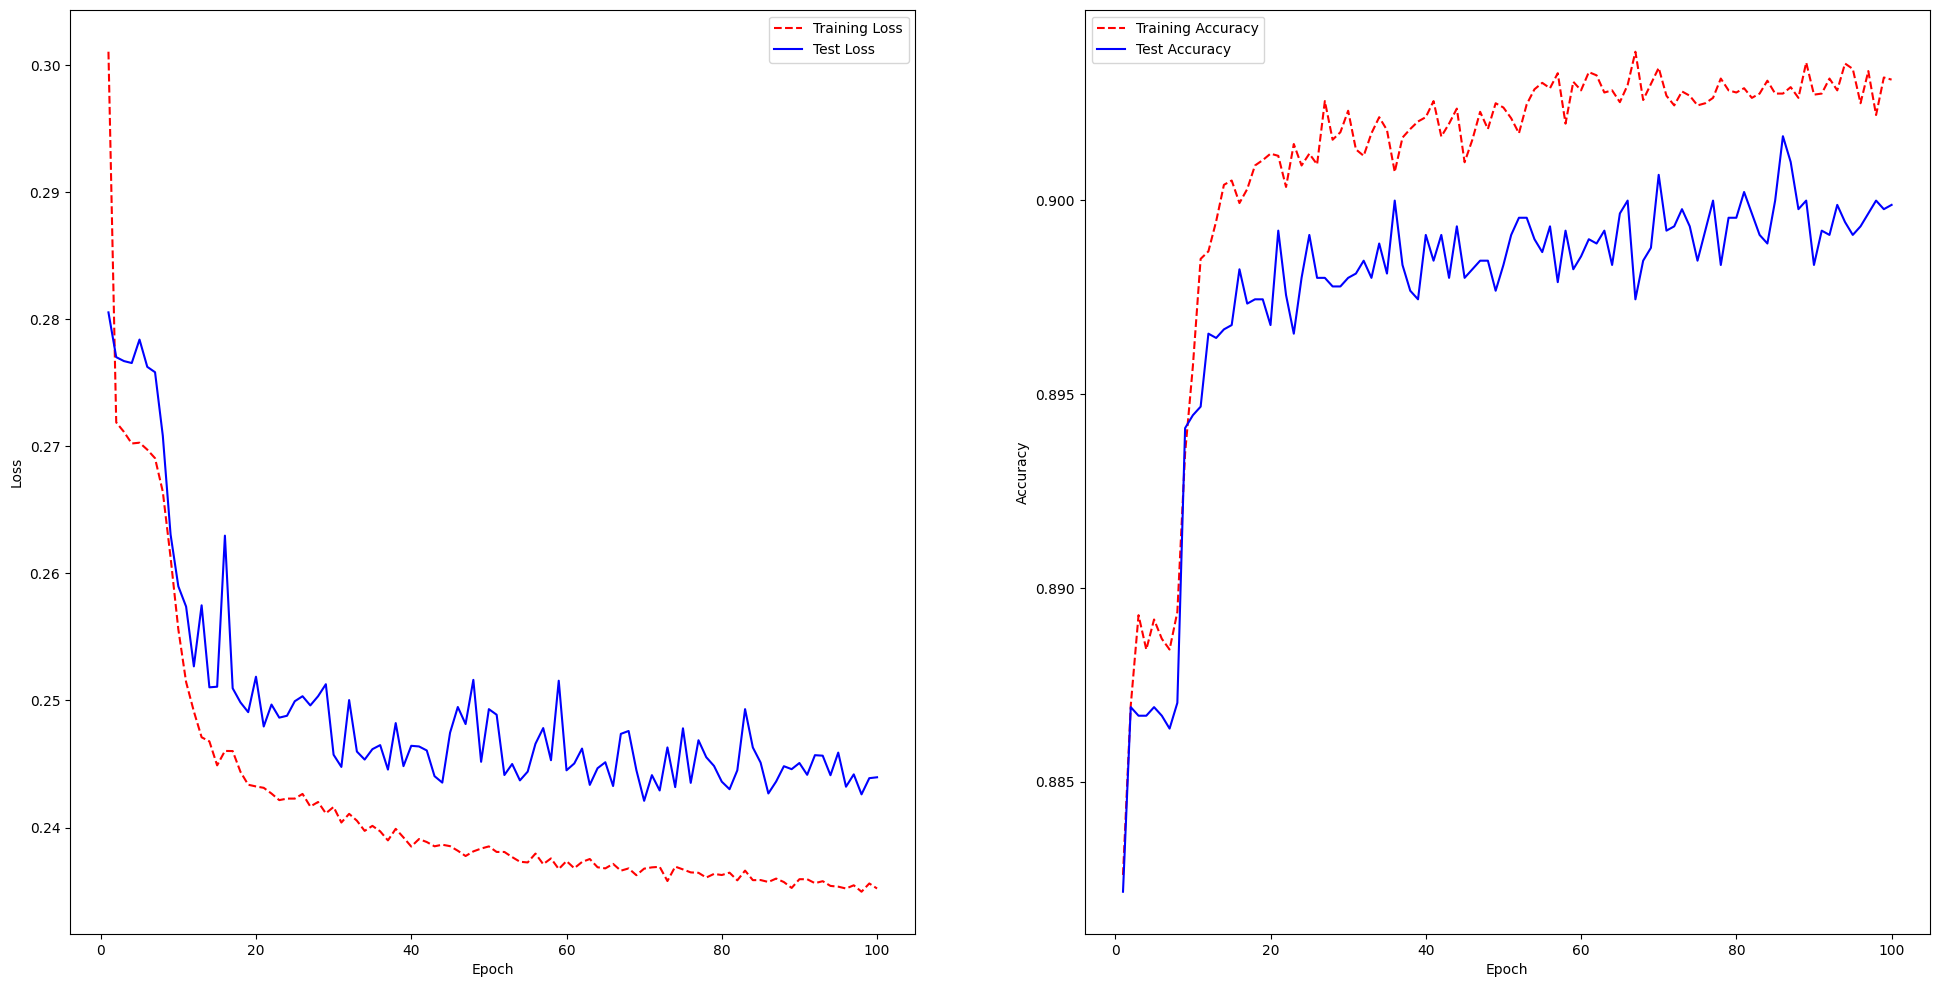

In [ ]:
# Get training and test loss histories
training_loss = history_tuned.history['loss']
test_loss = history_tuned.history['val_loss']
training_acc = history_tuned.history['accuracy']
test_acc = history_tuned.history['val_accuracy']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.figure(figsize=(24, 12))
plt.subplot(1, 2, 1)
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.subplot(1, 2, 2)
plt.plot(epoch_count, training_acc, 'r--')
plt.plot(epoch_count, test_acc, 'b-')
plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
kerasNN_tuned_pred = (tuned_model.predict(x_test)).round().astype(int)
print("Classification report on Test data with Keras NN Tuned Model\n=======================")
print(classification_report(y_true=y_test, y_pred=kerasNN_tuned_pred))

283/283 [==============================] - 1s 3ms/step
Classification report on Test data with Keras NN Tuned Model
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7965
           1       0.63      0.37      0.46      1064

    accuracy                           0.90      9029
   macro avg       0.77      0.67      0.70      9029
weighted avg       0.89      0.90      0.89      9029



In [ ]:
tuned_model2 = createModel_tuned(64, [16])
tuned_model2.summary()

Model: "Tuned_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Layer (Dense)         (None, 64)                448       
                                                                 
 Hidden_Layer_0 (Dense)      (None, 16)                1040      
                                                                 
 Output_Layer (Dense)        (None, 1)                 17        
                                                                 
Total params: 1,505
Trainable params: 1,505
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_tuned2 = tuned_model2.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_test, y_test), use_multiprocessing=True)

Epoch 1/100
1129/1129 [==============================] - 7s 6ms/step - loss: 0.7582 - accuracy: 0.8532 - val_loss: 0.3609 - val_accuracy: 0.8822
Epoch 2/100
1129/1129 [==============================] - 6s 6ms/step - loss: 0.3072 - accuracy: 0.8845 - val_loss: 0.2866 - val_accuracy: 0.8840
Epoch 3/100
1129/1129 [==============================] - 7s 6ms/step - loss: 0.2657 - accuracy: 0.8920 - val_loss: 0.2636 - val_accuracy: 0.8894
Epoch 4/100
1129/1129 [==============================] - 6s 6ms/step - loss: 0.2540 - accuracy: 0.8955 - val_loss: 0.2608 - val_accuracy: 0.8926
Epoch 5/100
1129/1129 [==============================] - 6s 6ms/step - loss: 0.2505 - accuracy: 0.8975 - val_loss: 0.2530 - val_accuracy: 0.8956
Epoch 6/100
1129/1129 [==============================] - 7s 7ms/step - loss: 0.2480 - accuracy: 0.9001 - val_loss: 0.2508 - val_accuracy: 0.8974
Epoch 7/100
1129/1129 [==============================] - 7s 6ms/step - loss: 0.2462 - accuracy: 0.8995 - val_loss: 0.2527 - val_ac

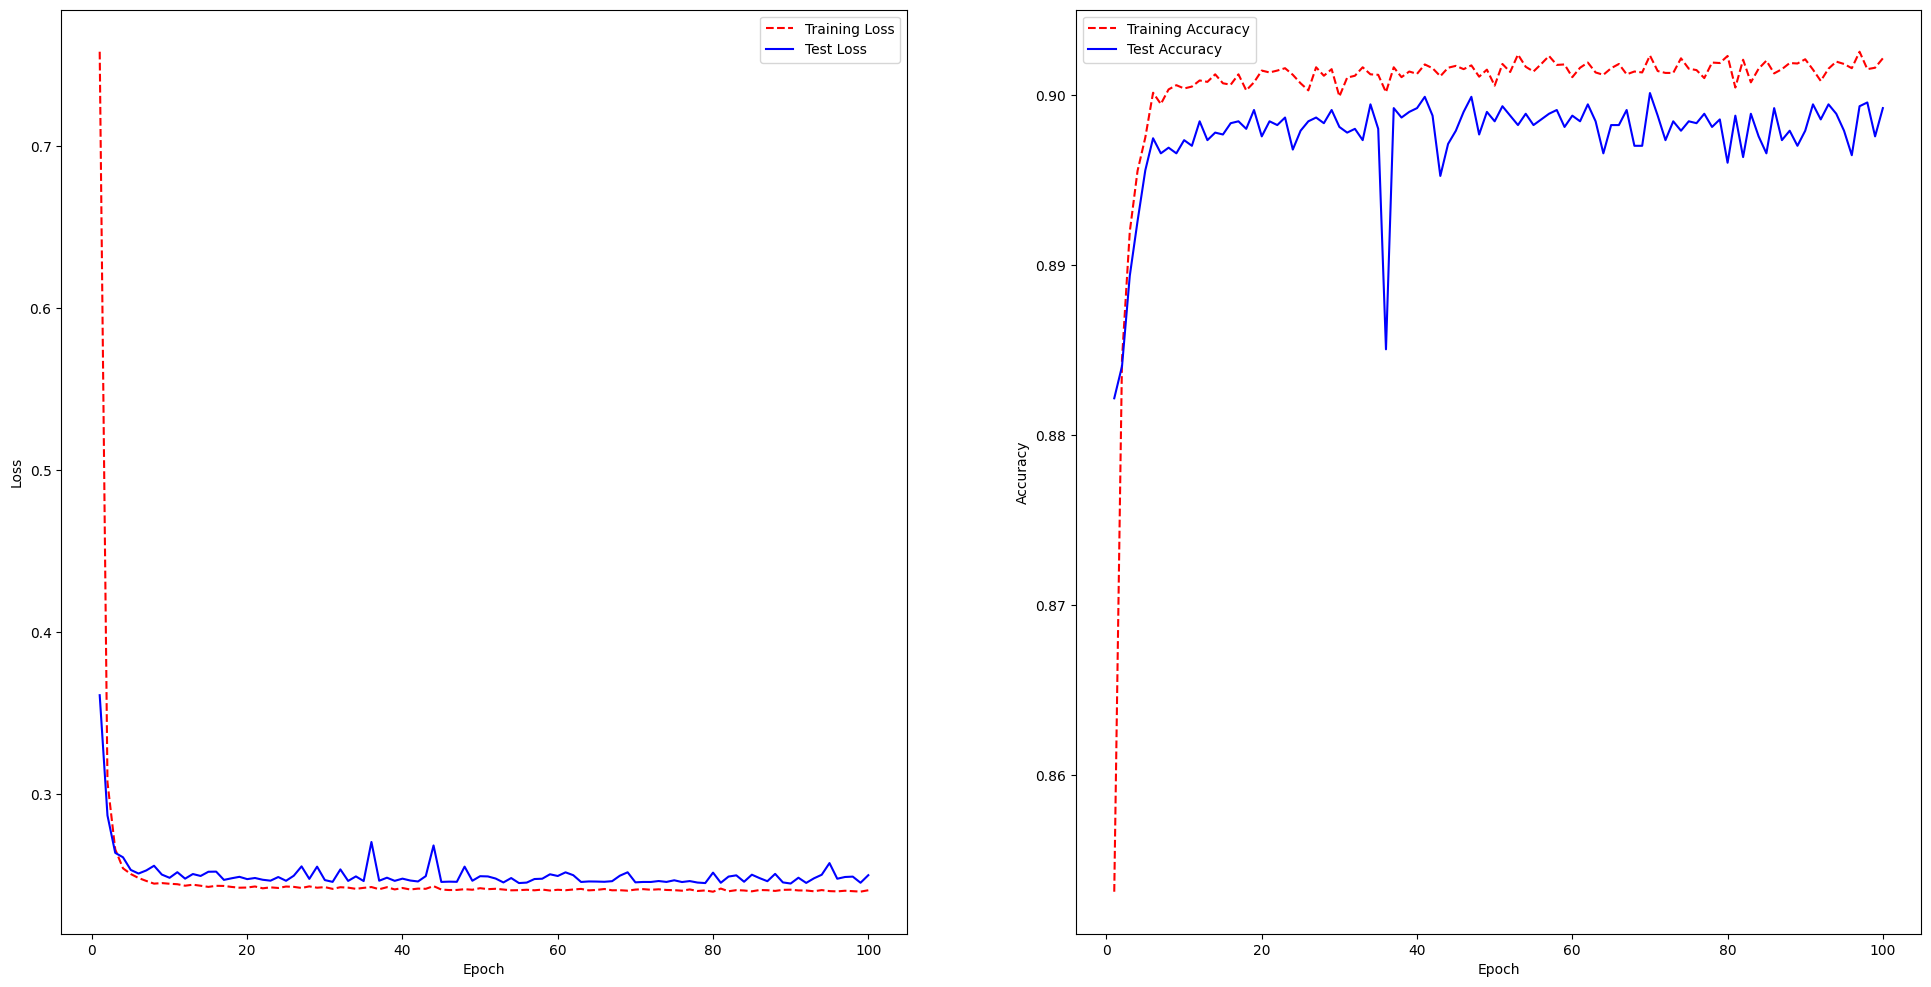

In [ ]:
# Get training and test loss histories
training_loss = history_tuned2.history['loss']
test_loss = history_tuned2.history['val_loss']
training_acc = history_tuned2.history['accuracy']
test_acc = history_tuned2.history['val_accuracy']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.figure(figsize=(24, 12))
plt.subplot(1, 2, 1)
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.subplot(1, 2, 2)
plt.plot(epoch_count, training_acc, 'r--')
plt.plot(epoch_count, test_acc, 'b-')
plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
kerasNN_tuned2_pred = (tuned_model2.predict(x_test)).round().astype(int)
print("Classification report on Test data with Keras NN Tuned Model 2\n=======================")
print(classification_report(y_true=y_test, y_pred=kerasNN_tuned2_pred))

283/283 [==============================] - 0s 1ms/step
Classification report on Test data with Keras NN Tuned Model 2
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7965
           1       0.66      0.30      0.41      1064

    accuracy                           0.90      9029
   macro avg       0.79      0.64      0.68      9029
weighted avg       0.88      0.90      0.88      9029



### **Experiment 8 : Supervised Neighbors Classifier**

#### **KNeighbors Classifier**

In [ ]:
KN_param = [{ 'n_neighbors' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
             'weights' : ['uniform', 'distance'],
             'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
             'leaf_size' : [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
              }]

KN_clf = KNeighborsClassifier(n_jobs=-1)

grid_KN_clf = GridSearchCV(KN_clf
                       ,KN_param
                       ,cv=4
                       ,scoring='f1'
                       ,n_jobs=-1)

grid_KN_clf.fit(x_train, y_train)
print("tuned hpyerparameters :(best parameters) ",grid_KN_clf.best_params_)
print("f1 :",grid_KN_clf.best_score_)

In [ ]:
KN_clf = KNeighborsClassifier(n_neighbors=grid_KN_clf.best_params_['n_neighbors'],
                              algorithm=grid_KN_clf.best_params_['algorithm'],
                              leaf_size=grid_KN_clf.best_params_['leaf_size'],
                              weights=grid_KN_clf.best_params_['weights'],
                              n_jobs=-1
                              )

KN_clf.fit(x_train, y_train)

y_pred_test = KN_clf.predict(x_test)

print("Classification report on Test data with K Neighbors Classifier\n=======================")
print(classification_report(y_true=y_test, y_pred=y_pred_test)) 

#### **Radius Neighbors Classifier**

In [ ]:
# RN_param = [{ 'radius' : [1, 2],
#              'weights' : ['uniform', 'distance'],
#              'leaf_size' : [20, 30],
#               }]
# RN_clf = RadiusNeighborsClassifier(n_jobs=-1)

# grid_RN_clf = GridSearchCV(RN_clf
#                        ,RN_param
#                        ,cv=4
#                        ,scoring='f1'
#                        ,n_jobs=-1)

# grid_RN_clf.fit(x_train, y_train)
# print("tuned hpyerparameters :(best parameters) ",grid_RN_clf.best_params_)
# print("f1 :",grid_RN_clf.best_score_)

In [ ]:
RN_clf = RadiusNeighborsClassifier(n_jobs=-1 , radius=15)

RN_clf.fit(x_train, y_train)

y_pred_test = RN_clf.predict(x_test)

print("Classification report on Test data with Radius Neighbors Classifier\n=======================")
print(classification_report(y_true=y_test, y_pred=y_pred_test)) 

Classification report on Test data with Radius Neighbors Classifier
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      7965
           1       0.50      0.01      0.03      1064

    accuracy                           0.88      9029
   macro avg       0.69      0.51      0.48      9029
weighted avg       0.84      0.88      0.83      9029



#### **Nearest Centroid**

In [ ]:
NC_param = [{ 'shrink_threshold' : [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1],
             }]

NC_clf = NearestCentroid()

grid_NC_clf = GridSearchCV(NC_clf
                       ,NC_param
                       ,cv=4
                       ,scoring='f1'
                       ,n_jobs=-1)

grid_NC_clf.fit(x_train, y_train)
print("tuned hpyerparameters :(best parameters) ",grid_NC_clf.best_params_)
print("f1 :",grid_NC_clf.best_score_)

tuned hpyerparameters :(best parameters)  {'shrink_threshold': 0.34}
f1 : 0.2778582239366667


In [ ]:
NC_clf = NearestCentroid(shrink_threshold=grid_NC_clf.best_params_['shrink_threshold'])

NC_clf.fit(x_train, y_train)

y_pred_test = NC_clf.predict(x_test)

print("Classification report on Test data with Nearest Centroid\n=======================")
print(classification_report(y_true=y_test, y_pred=y_pred_test)) 

Classification report on Test data with Nearest Centroid
              precision    recall  f1-score   support

           0       0.91      0.85      0.88      7965
           1       0.24      0.34      0.28      1064

    accuracy                           0.79      9029
   macro avg       0.57      0.60      0.58      9029
weighted avg       0.83      0.79      0.81      9029



# Test code

In [ ]:
class columnDropperTransformer():
    def __init__(self,columns):
        self.columns=columns

    def transform(self,X,y=None,**transform_params):
        return X.drop(self.columns,axis=1)

    def fit(self, X, y=None, **fit_params):
        return self 


In [ ]:
toEncode = [["single","married","divorced"], ["unknown","primary","secondary","tertiary"]]
columnToEncode = ['marital', 'education']

LE_pipeline = Pipeline([
    ("LabelEncoder", LabelEncoder2(toEncode, columnToEncode))
])

In [ ]:
drop_features = ['duration']
# drop_transformer = ColumnTransformer(transformers=['drop_columns', 'drop', drop_features], remainder='passthrough')
drop_pipeline = Pipeline([
    ("columnDropper", columnDropperTransformer(drop_features))
])

In [ ]:
dfpipe = dfOri.copy()

numeric_features = dfpipe.select_dtypes(include=['int64', 'float64']).columns.drop('duration')

categorical_features = dfpipe.select_dtypes(include=['object']).drop(['y'], axis=1).columns

numeric_transformer = Pipeline(steps=[
      ('imputer', SimpleImputer(strategy='mean')),
      ('scaler', MinMaxScaler())
])

categorical_transformer = Pipeline(steps=[
       ('imputer', SimpleImputer(strategy='constant')),
      ('encoder', OneHotEncoder())
])

preprocessor = ColumnTransformer(
   transformers=[
    ('numeric', numeric_transformer, numeric_features)
   ,('categorical', categorical_transformer, categorical_features)
]) 

pipeline_tree = Pipeline(steps = [
            ('drop', drop_pipeline),
            ('preprocessor', preprocessor),
            ('regressor',DecisionTreeClassifier())
           ])

In [ ]:
x = dfpipe.drop(['y'], axis = 1)
y = dfpipe['y']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

clf_tree = pipeline_tree.fit(x_train, y_train)

# clf = DecisionTreeClassifier()
# clf.fit(clf_tree.transform(x_train), y_train)
y_pred = clf_tree.predict(x_test)

print("Classification report on Train data\n=======================")
print(classification_report(y_true=y_test, y_pred=y_pred))
print("Confusion matrix on Train data\n=======================")

print(confusion_matrix(y_true=y_test, y_pred=y_pred))

In [ ]:
clf_tree

In [ ]:
# check unknown values
dfOri.isnull().sum()